In [154]:
#Loading the Main Packages

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import dexplot as dxp
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import scipy.stats as stats
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
import pickle

In [261]:
# Loading Dataset into a pandas dataframe

indicators_df = pd.read_csv("/Users/Simo/Downloads/heart_2020_cleaned.csv")
indicators_df.head()


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [264]:
indicators_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [156]:
# Removing some columns

filtered_df = indicators_df[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer']]

# <span style="color:#87CEEB">Exploratory Analysis Of Dataset</span>
I will proceed to analyse and review the data for possible errors, missing values, outliers, and class imbalance in my chosen response variable to guide my preprocessing steps.

## Overview of Data

In [157]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   DiffWalking       319795 non-null  object 
 6   Sex               319795 non-null  object 
 7   AgeCategory       319795 non-null  object 
 8   Race              319795 non-null  object 
 9   Diabetic          319795 non-null  object 
 10  PhysicalActivity  319795 non-null  object 
 11  GenHealth         319795 non-null  object 
 12  SleepTime         319795 non-null  float64
 13  Asthma            319795 non-null  object 
 14  KidneyDisease     319795 non-null  object 
 15  SkinCancer        319795 non-null  object 
dtypes: float64(2), objec

In [158]:
filtered_df.describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


In [159]:
#Checking for missing values

filtered_df.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

Observations:
* The data consist 3 protected characteristics: Sex, AgeCategory, Race
* The filtered data is made up of 16 attributes and about 320k instances.
* Of the 16 attributes, there are 2 numerical attributes (float type) and 14 categorical attributes (object type).
* The chosen target variable is 'Heart Disease'. This leaves us with 13 categorical attributes. 
* There are no missing values in the data.
* There has been no evidence of errors.

Further analysis is done on the target variable, numerical predictors, and categorical predictors.


## Analysis on Target Variable

No     91.44%
Yes     8.56%
Name: HeartDisease, dtype: object


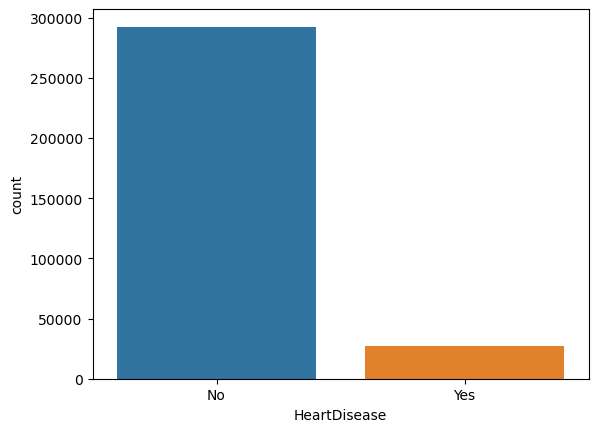

In [271]:
# Visualizing the response class distribution

sns.countplot(x='HeartDisease', data=filtered_df)

# Checking the distribution of the response variable classes in percentage

target_class_distr = indicators_df["HeartDisease"].value_counts(normalize=True) * 100

formatted_distr = target_class_distr.map('{:.2f}%'.format)

print(formatted_distr)


In [268]:
# Checking the distribution of the response variable classes in percentage

target_class_distr = indicators_df["HeartDisease"].value_counts(normalize=True) * 100

formatted_distr = target_class_distr.map('{:.2f}%'.format)

formatted_distr

No     91.44%
Yes     8.56%
Name: HeartDisease, dtype: object

### Observations:

The target variable has 2 distinct classes ('Yes' & 'No'). It can be seen that the minority class of the target variable variable ('Yes') is highly underrepresented (8.56% of the total instances) and if this is not balanced the model will tend to classify into the class with more instances.

I will be applying an Undersampling technique to tackle the problem of class imbalance.

## Analysis on Numerical Predictors

In [162]:
# Finding the numerical columns in the indicators_df dataframe.
numerical_predictors = filtered_df.select_dtypes(include='float').columns
numerical_predictors


Index(['BMI', 'SleepTime'], dtype='object')

In [163]:
#Creating List for the numerical predictor attributes for further computing

num_predictors_list = ['BMI', 'SleepTime']

#Previewing the numerical attributes from the indicators_df dataframe

filtered_df[numerical_predictors].head()

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0


In [164]:
filtered_df[numerical_predictors].describe().T

,count,mean,std,min,25%,50%,75%,max
BMI,319795.0,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
SleepTime,319795.0,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


Below are visualizations of the distribuitions of the numerical variables.

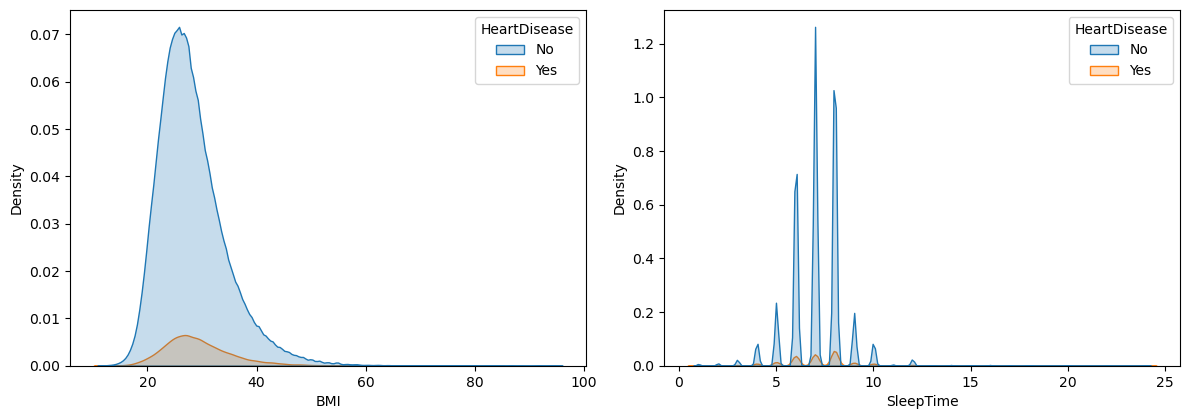

In [165]:
nrows, ncols = 2, 2
combine_features = filtered_df[numerical_predictors]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=filtered_df[numerical_predictors],x = filtered_df[name_feature] , hue=filtered_df["HeartDisease"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

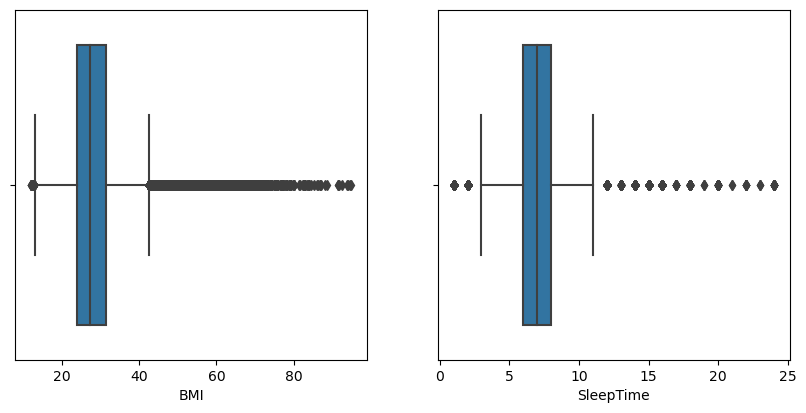

In [166]:
# Checking for potential outliers using boxplot

'''The boxplot displays the distributions of the numerical variables
and highlights potential outliers'''

i = 1
plt.figure(figsize = (10,10))
for column in numerical_predictors:
    plt.subplot(2,2,i)
    sns.boxplot(x = column, data = filtered_df)
    i +=1

In [167]:
#Display Mean and median of numerical predictors

print("Mean of Numerical Attributes:\n",filtered_df[numerical_predictors].mean().T, "\n")
print("Median of Numerical Attributes:\n",filtered_df[numerical_predictors].median().T)

Mean of Numerical Attributes:
 BMI          28.325399
SleepTime     7.097075
dtype: float64 

Median of Numerical Attributes:
 BMI          27.34
SleepTime     7.00
dtype: float64


### Observations:

* From the visualization plots, It can be seen that people with heart disease on the average, have lesser sleep and their BMI's are slightly higher.
* For each boxplot, the box represents the interquartile range (IQR) of the distributions of each numerical variable. The horizontal line in each box represents the median value and the whiskers extend to the smallest and largest observations within 1.5 times the IQR from the edge of the box. The points (dots) appearing outside this range represent potential outliers.
* It can be seen that both numerical variables contain outliers as they appear to be assymetrical about their means. 
* The boxplots of both attributes appear to have similar interquartile range

The outliers will be handled later on in the data preprocessing stage

## Analysis on Categorical Predictors

In [168]:
# Finding the categorical columns in the indicators_df dataframe

categorical_attributes = filtered_df.select_dtypes(include='object').columns
categorical_attributes

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [169]:
# Creating a List of the categorical predictor attributes for further computing

cat_predictors_list = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer']

#Previewing the categorical predictors from the indicators_df dataframe

filtered_df[cat_predictors_list].head()

,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
0,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,Yes,No,Yes
1,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,No,No,No
2,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,Yes,No,No
3,No,No,No,No,Female,75-79,White,No,No,Good,No,No,Yes
4,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,No,No,No


In [170]:
indicators_df[cat_predictors_list].describe().T

,count,unique,top,freq
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957
GenHealth,319795,5,Very good,113858


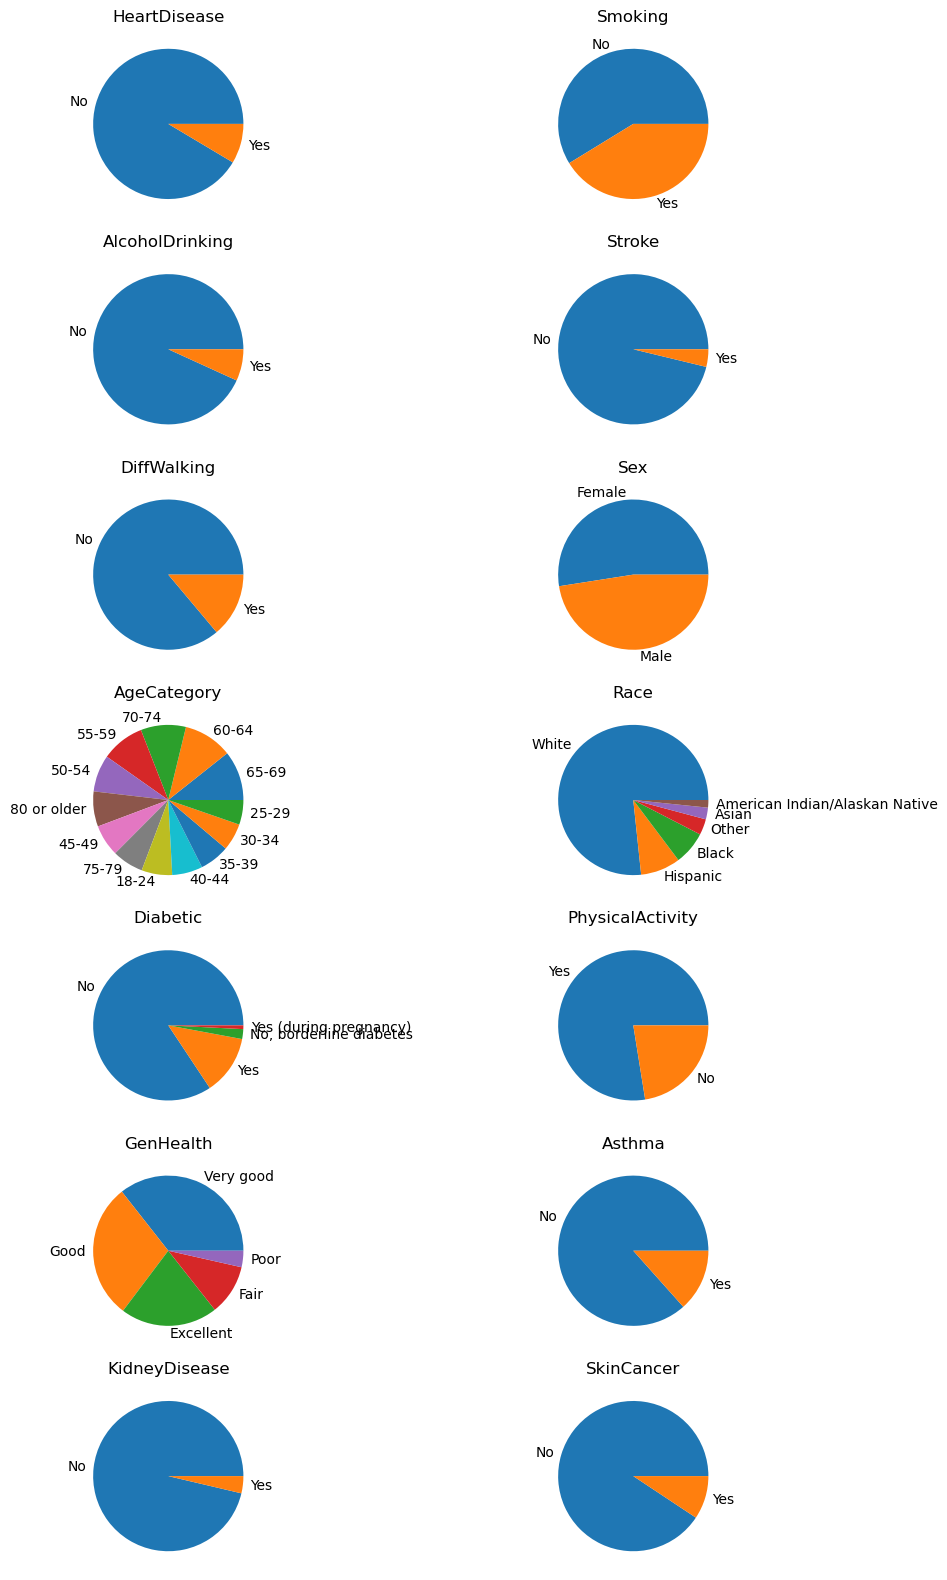

In [171]:
fig,axes = plt.subplots(nrows=7, ncols=2, figsize=(11, 20), dpi=100)

for col, ax in zip(filtered_df[categorical_attributes], axes.ravel()):
    filtered_df[col].value_counts().plot(kind="pie", ax=ax).set_title(col)
    ax.set(ylabel='', title=col, aspect='equal')
plt.show()

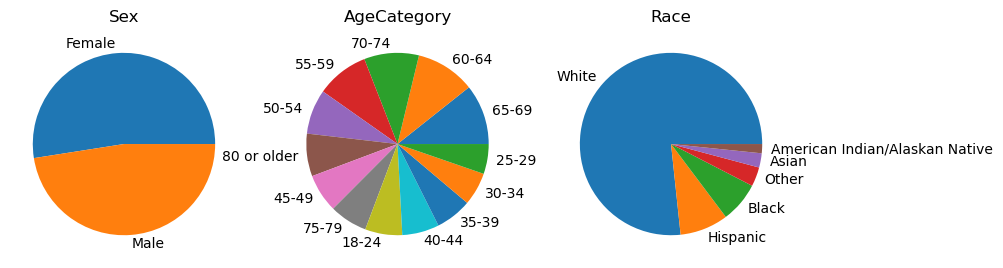

White                             76.68%
Hispanic                           8.58%
Black                              7.17%
Other                              3.42%
Asian                              2.52%
American Indian/Alaskan Native     1.63%
Name: Race, dtype: object


In [283]:
#Visualize the protected characteristics

protected_xtics = ['Sex', 'AgeCategory', 'Race']

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), dpi=100)

for col, ax in zip(filtered_df[protected_xtics], axes.ravel()):
    filtered_df[col].value_counts().plot(kind="pie", ax=ax).set_title(col)
    ax.set(ylabel='', title=col, aspect='equal')
plt.show()

race_class_distr = filtered_df["Race"].value_counts(normalize=True) * 100

formatted_distr_r = race_class_distr.map('{:.2f}%'.format)

print(formatted_distr_r)

### Observations and Actions:

Recall that the data contains 3 protected characteristics (Sex, AgeCategory and Race).

* In the 'Sex' chart, there seems to be a slight difference in the class distribution between 'Male' and 'Female'.
* The 'AgeCategory' classes appear to be reasonable distributed.
* In the 'Race' pie chart, it can be seen that majority class ('white') is highly overrepresented in comparison with the other 5 races combined. 

For the purpose of this report, the investigation of bias in my ML model is focused on the 'Race' attribute.

To do this, the classes of the 'Race' feature were grouped into 2 Race categories (Relabelled 'White' and 'NonWhite').

In [284]:
filtered_df['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [286]:
# Define a function to recode race column
def recode_race(race):
    if race == 'White':
        return 'White'
    else:
        return 'Nonwhite'

# Apply the function to a new column
filtered_df_copy = filtered_df.copy()
filtered_df_copy.loc[:, 'Recoded_Race'] = filtered_df_copy['Race'].apply(recode_race)

print(filtered_df_copy['Recoded_Race'].unique())


['White' 'Nonwhite']


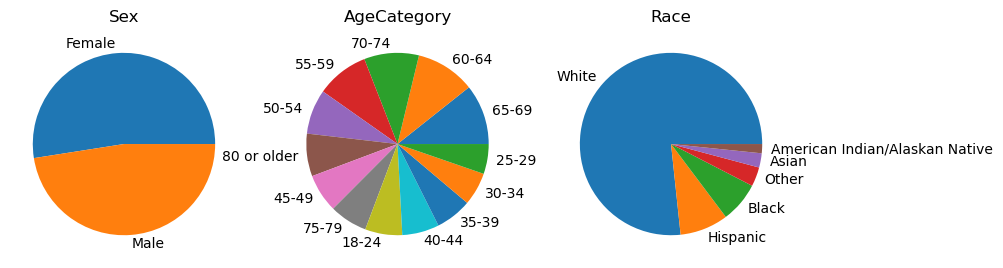

White       76.68%
Nonwhite    23.32%
Name: Recoded_Race, dtype: object


In [287]:
#Visualize the protected characteristics

protected_xtics = ['Sex', 'AgeCategory', 'Race']

fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10), dpi=100)

for col, ax in zip(filtered_df[protected_xtics], axes.ravel()):
    filtered_df[col].value_counts().plot(kind="pie", ax=ax).set_title(col)
    ax.set(ylabel='', title=col, aspect='equal')
plt.show()

race_class_distr = filtered_df_copy["Recoded_Race"].value_counts(normalize=True) * 100

formatted_distr_r = race_class_distr.map('{:.2f}%'.format)

print(formatted_distr_r)

In [174]:
filtered_df_copy.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Recoded_Race
0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,White
1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,White
2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,White
3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,White
4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,White


In [175]:

categorical_attributes = filtered_df_copy.select_dtypes(include='object').columns
categorical_attributes

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race'],
      dtype='object')

In [176]:
cat_predictors_list = ['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Race', 'Diabetic', 'PhysicalActivity',
       'GenHealth', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race']

cat_predictors_list

['Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Race',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'Recoded_Race']

In [177]:
filtered_df_copy[categorical_attributes].describe().T

,count,unique,top,freq
HeartDisease,319795,2,No,292422
Smoking,319795,2,No,187887
AlcoholDrinking,319795,2,No,298018
Stroke,319795,2,No,307726
DiffWalking,319795,2,No,275385
Sex,319795,2,Female,167805
AgeCategory,319795,13,65-69,34151
Race,319795,6,White,245212
Diabetic,319795,4,No,269653
PhysicalActivity,319795,2,Yes,247957


In [178]:
filtered_df_copy.isna().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
Recoded_Race        0
dtype: int64

<AxesSubplot:xlabel='Race', ylabel='count'>

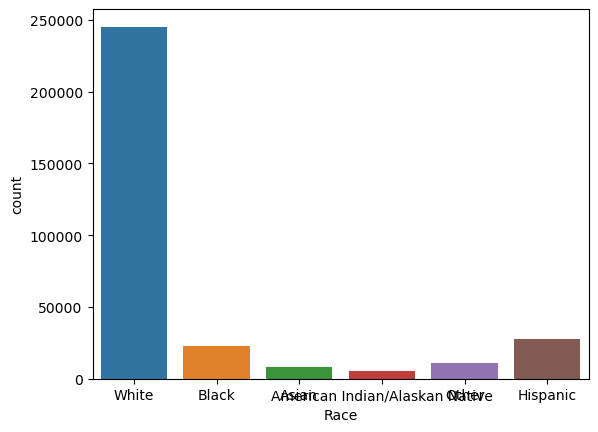

In [179]:
sns.countplot(x='Race', data=filtered_df_copy)

<AxesSubplot:xlabel='Recoded_Race', ylabel='count'>

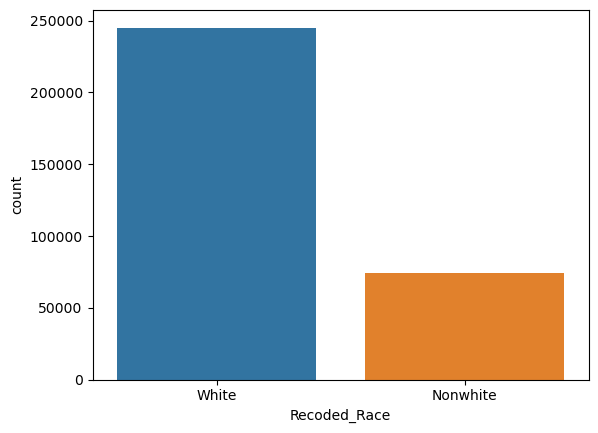

In [180]:
sns.countplot(x='Recoded_Race', data=filtered_df_copy)

In [181]:
cat_list = list(filtered_df_copy[categorical_attributes])

hue_list = [var for var in cat_list if var not in ['Race']]

hue_list

['HeartDisease',
 'Smoking',
 'AlcoholDrinking',
 'Stroke',
 'DiffWalking',
 'Sex',
 'AgeCategory',
 'Diabetic',
 'PhysicalActivity',
 'GenHealth',
 'Asthma',
 'KidneyDisease',
 'SkinCancer',
 'Recoded_Race']

/var/folders/tn/6jlpx2cs1x12ct2sz51czzjw0000gn/T/ipykernel_30816/725044188.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


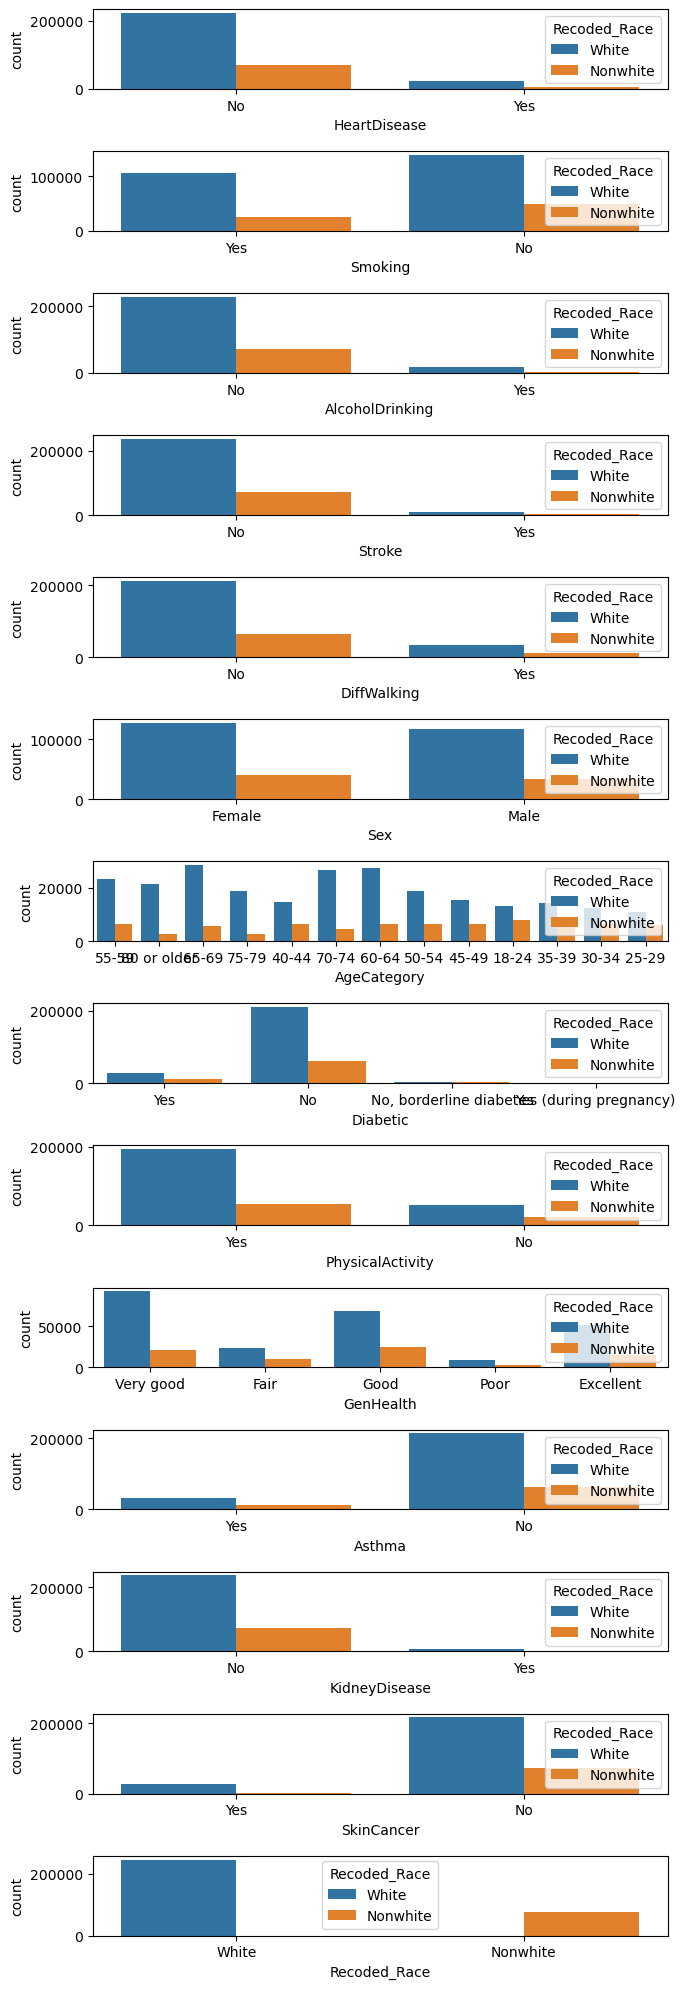

In [182]:
fig, ax = plt.subplots(14, 1, figsize=(7,20))
axes = ax.flatten()

for i, col in enumerate(filtered_df_copy[hue_list]):
    sns.countplot(x=col, hue='Recoded_Race', data=filtered_df_copy, ax=axes[i])

fig.tight_layout()
fig.show()

### Observations:

* ......
* ......
* .....

# <span style="color:#87CEEB">Data Preprocessing</span>
The dataset will be preprocessed based on the exploratory analysis carried out in the previous segments of the code.

## Numerical Predictors: Dealing with Outliers

Recall: from the boxplots that the distributions of the numerical predictors are assymetrical about their mean values. The horizontal line in each box of the numerical predictor box plots represents the median value and the whiskers extend to the smallest and largest observations within 1.5 times the IQR from the edge of the box. The points (dots) appearing outside this range represent potential outliers.

I will be applying the the Trimming (IQR Method to deal with outliers. It involves removing extreme outliers beyond the whiskers of some of the box plots of the numerical predictors.

In [183]:
# Finding the numerical columns in the indicators_df dataframe.
numerical_predictors = filtered_df_copy.select_dtypes(include='float').columns
numerical_predictors

#Creating List for the numerical predictor attributes for further computing

num_predictors_list = ['BMI', 'SleepTime']

#Previewing the numerical attributes from the indicators_df dataframe

filtered_df_copy[numerical_predictors].head()

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0


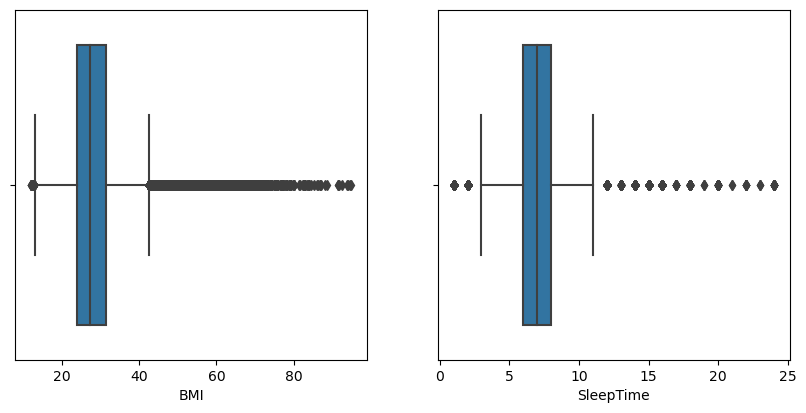

In [184]:
# Box plots showing potential outliers before applying IQR method

i = 1
plt.figure(figsize = (10,10))
for column in numerical_predictors:
    plt.subplot(2,2,i)
    sns.boxplot(x = column, data = filtered_df_copy)
    i +=1

The cell below defines a function to quantify the extent to which the numerical predictors are skewed

In [185]:
def skewness(df, skewness_limit=0.75):
    
    # Calculate the skewness of the numerical predictors in the given df
    skewness_values = df.skew()
    
    # Sort the skewness values in descending order
    # Convert them to a dataframe, and rename the column to 'SkewnessLevel'
    # Keep only the columns where the absolute skewness value is greater than the skewness limit defined earlier
    global skewed_columns
    skewed_columns = (skewness_values
                 .sort_values(ascending=False)
                 .to_frame()
                 .rename(columns={0:'Skewness'})
                 .query('abs(Skewness) > {}'.format(skewness_limit)))
    
    # Print the resulting dataframe with the columns sorted by decreasing absolute skewness value
    print(skewed_columns)
    
skewness(filtered_df_copy[numerical_predictors])

     Skewness
BMI  1.332431


### Observations and Actions:

From the box plots and the skewness levels, it appears that both numerical predictors have outliers but 'BMI' is the most skew.
'BMI' and 'SleepTime' distributions appear to have similar IQR.
I decided to apply the IQR method to the 'BMI' and 'SleepTime' columns. Only about 5% data was lost this time.

The code below computes the upper and lower whiskers of the box plots for each of the numerical predictors in the 'indicators_df' dataframe.

In [186]:
# Define an empty DataFrame to store the whiskers
whiskers = pd.DataFrame(columns=['LowerW', 'UpperW'])

# Iterate over the numerical columns
for col in numerical_predictors:
    
    # Calculate the median and quartiles
    median = np.median(filtered_df_copy[col])
    q25 = np.percentile(filtered_df_copy[col], 25)
    q75 = np.percentile(filtered_df_copy[col], 75)

    # Calculate the interquartile range
    iqr = q75 - q25

    # Calculate the upper and lower whiskers
    upper_whisker = filtered_df_copy[col][filtered_df_copy[col] <= q75 + 1.5 * iqr].max()
    lower_whisker = filtered_df_copy[col][filtered_df_copy[col] >= q25 - 1.5 * iqr].min()

    # Add the whiskers to the DataFrame
    whiskers.loc[col] = [lower_whisker, upper_whisker]

whiskers


,LowerW,UpperW
BMI,12.97,42.5
SleepTime,3.00,11.0


Next, I filter the filtered_df DataFrame to keep only the instances where the values of the 'BMI' and 'SleepTime' predictors are within the whiskers of their respective box plots, and then compute summary statistics for the remaining rows of the DataFrame.

In [187]:
# Define a function to filter outliers
def filter_outliers(df, col, lower, upper):
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Filter the outliers using the whiskers
bmi_lower, bmi_upper = whiskers.loc['BMI', 'LowerW'], whiskers.loc['BMI', 'UpperW']
sleep_lower, sleep_upper = whiskers.loc['SleepTime', 'LowerW'], whiskers.loc['SleepTime', 'UpperW']
filtered_df_iqr = filter_outliers(filtered_df_copy, 'BMI', bmi_lower, bmi_upper)
filtered_df_iqr = filter_outliers(filtered_df_iqr, 'SleepTime', sleep_lower, sleep_upper)

# Reset the index and compute the summary statistics for the numerical columns
filtered_df_iqr = filtered_df_iqr.reset_index()
filtered_df_iqr[numerical_predictors].describe().T


,count,mean,std,min,25%,50%,75%,max
BMI,305113.0,27.664319,5.209102,12.97,23.81,27.12,30.9,42.5
SleepTime,305113.0,7.068489,1.229315,3.00,6.00,7.00,8.0,11.0


In [188]:
# Checking the amount of data that was lost after removing outliers

# Calculate the percentage of data loss after removing outliers
percent_data_loss = (len(filtered_df_iqr) - len(filtered_df_copy)) / len(filtered_df_copy) * 100

print("Percentage of Data Loss after removing outliers: {:.2f}%".format(percent_data_loss))


Percentage of Data Loss after removing outliers: -4.59%


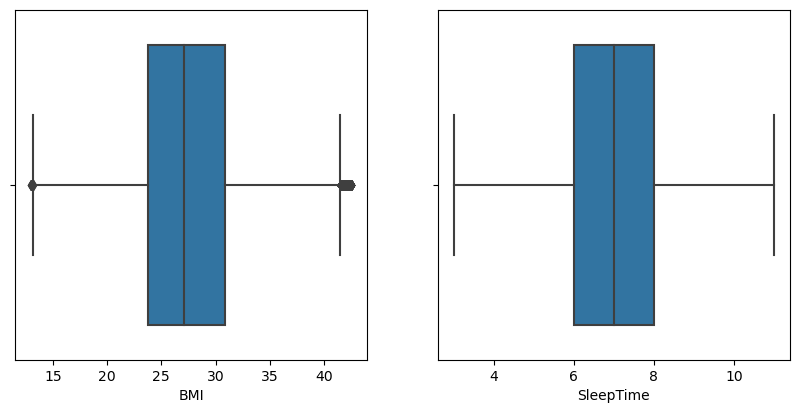

In [189]:
# Box plots visualizations after applying IQR method
i = 1
plt.figure(figsize = (10,10))
for column in numerical_predictors:
    plt.subplot(2,2,i)
    sns.boxplot(x = column, data = filtered_df_iqr)
    i +=1


It can be observed that both numerical predictors are no longer skewed are closer to normal distribution now.

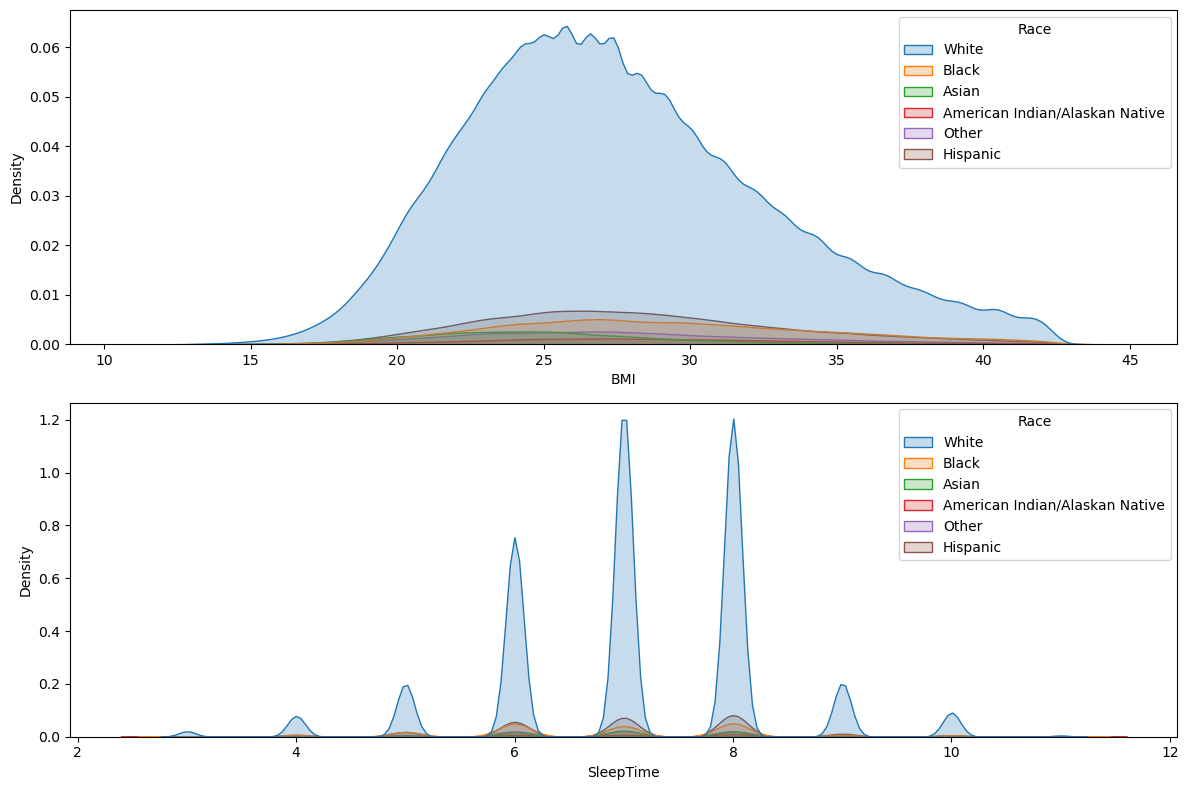

In [190]:
#Kernel Density plots of numerical predictors after all steps have been applied

nrows, ncols = 2, 1
combine_features = filtered_df_iqr[numerical_predictors]

fig = plt.figure(figsize=(12,8))    

for position, name_feature in zip(range(1,18),combine_features):
    axes = fig.add_subplot(nrows, ncols, position)
    sns.kdeplot(ax=axes,data=filtered_df_iqr[numerical_predictors],x = filtered_df_iqr[name_feature] , hue=filtered_df_iqr["Race"],fill=True,bw_adjust=.8)
    
fig.tight_layout()
plt.show()

In [191]:
# Creating a dataframe for the final cleaned numerical predictors
filtered_df_num = filtered_df_iqr[numerical_predictors].copy()

filtered_df_num

,BMI,SleepTime
0,16.60,5.0
1,20.34,7.0
2,26.58,8.0
3,24.21,6.0
4,23.71,8.0
...,...,...
305108,23.38,6.0
305109,22.22,8.0
305110,27.41,6.0
305111,29.84,5.0


## Categorical Attributes: Sorting and Encoding


The categorical attributes are sorted into nominal and ordinal variables in order to adequately encode the data for the ML models.

The nominal variables are encoded using the OneHotEncoder.

The ordinal variables are encoded using the OrdinalEncoder.

In [192]:
filtered_df_iqr[categorical_attributes].describe().T

,count,unique,top,freq
HeartDisease,305113,2,No,279644
Smoking,305113,2,No,179817
AlcoholDrinking,305113,2,No,284038
Stroke,305113,2,No,293968
DiffWalking,305113,2,No,266222
Sex,305113,2,Female,158778
AgeCategory,305113,13,65-69,32656
Race,305113,6,White,235208
Diabetic,305113,4,No,259706
PhysicalActivity,305113,2,Yes,239623


The next line of code identifies all unique classes in each categorical attribute to guide me in properly sorting them into nominal and ordinal variables.

In [193]:
# Identifying all unique classes in each categorical attribute
for i in cat_list:
    print(i)
    print(filtered_df_iqr[i].unique())

HeartDisease
['No' 'Yes']
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Race
['White' 'Black' 'Asian' 'American Indian/Alaskan Native' 'Other'
 'Hispanic']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
SkinCancer
['Yes' 'No']
Recoded_Race
['White' 'Nonwhite']


### Observations and Actions:

There is no inherent order between 'Yes' and 'No' therefore all 9 variables with only both aforementioned classes are considered binary nominal variables.

The 'Sex' variable is also considered a binary nominal variable as there is no inherent order between 'Female' and 'Male'.

The 'Race' variable is also considered a binary nominal variable as there is no inherent order between races.

The 'AgeCategory' variable is a multi-level variable with 13 levels. I have observed that the widths of each age range are not entirely uniform ('80 or older'), hence the assumption of equidistance may not hold and so this may be treated as a nominal variable. However, being that all levels represent ordered ranges of age, it will be treated as an ordinal variable, also because treating it as nominal and encoding it using one-hot encoding will introduce of 12 more binary columns to the data and this can increase the complexity of the model and the risk of overfitting.

The 'Diabetic' variable is a multi-level variable with 4 levels. The levels of this variable do not suggest a clear order or ranking, as 'Yes' does not necessarily indicate a higher or lower value than 'Yes (during pregnancy)', 'No' or 'No, borderline diabetes'. Therefore, this variable was considered nominal.

The 'GenHealth' variable is a multi-level variable with 5 levels. These levels do suggest an order or ranking, where 'Very good' is better than 'Fair', which is better than 'Poor', etc. Therefore, this variable was considered ordinal.

This leaves me with: 
* 12 nominal variables; 11 binary and 1 non-binary variable ("Diabetic")
* 2 ordinal variables ('AgeCategory' and 'GenHealth')



In [194]:
filtered_df_iqr.head()

,index,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,Recoded_Race
0,0,No,16.60,Yes,No,No,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes,White
1,1,No,20.34,No,No,Yes,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No,White
2,2,No,26.58,Yes,No,No,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No,White
3,3,No,24.21,No,No,No,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes,White
4,4,No,23.71,No,No,No,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No,White


In [195]:
# Removing some columns

filtered_df_iqr = filtered_df_iqr[['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race']]

#### Next I group the categorical attributes into nominal and ordinal variables

In [196]:
categorical_attributes = filtered_df_iqr.select_dtypes(include='object').columns
categorical_attributes

Index(['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking',
       'Sex', 'AgeCategory', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race'],
      dtype='object')

In [197]:
cat_list = list(filtered_df_iqr[categorical_attributes])

In [198]:
# Identifying all unique classes in each categorical attribute
for i in cat_list:
    print(i)
    print(filtered_df_iqr[i].unique())

HeartDisease
['No' 'Yes']
Smoking
['Yes' 'No']
AlcoholDrinking
['No' 'Yes']
Stroke
['No' 'Yes']
DiffWalking
['No' 'Yes']
Sex
['Female' 'Male']
AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
Diabetic
['Yes' 'No' 'No, borderline diabetes' 'Yes (during pregnancy)']
PhysicalActivity
['Yes' 'No']
GenHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
Asthma
['Yes' 'No']
KidneyDisease
['No' 'Yes']
SkinCancer
['Yes' 'No']
Recoded_Race
['White' 'Nonwhite']


In [199]:
# Create a list of all binary variables
binary_var_list= list()
for i in cat_list:
    if filtered_df_iqr[i].nunique()<3:
        binary_var_list.append(i)

# Create a list of all non-binary variables
nonbinary_var_list= list()
for i in cat_list:
    if filtered_df_iqr[i].nunique()>2:
        nonbinary_var_list.append(i)

print("Binary Variables below:\n", binary_var_list, "\n\nTotal:", len(binary_var_list), "\n")
print("Non-Binary Variables below:\n", nonbinary_var_list, "\n\nTotal:", len(nonbinary_var_list), "\n")

Binary Variables below:
 ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race'] 

Total: 11 

Non-Binary Variables below:
 ['AgeCategory', 'Diabetic', 'GenHealth'] 

Total: 3 



In [200]:
# Create a list of Nominal variables
nominal_var_list= binary_var_list + ["Diabetic"]


# Create a list of ordinal variables
ordinal_var_list = [var for var in nonbinary_var_list if var not in ['Diabetic']]

print("Nominal Variables below:\n", nominal_var_list, "\n\nTotal:", len(nominal_var_list), "\n")
print("Ordinal Variables below:\n", ordinal_var_list, "\n\nTotal:", len(ordinal_var_list), "\n")

Nominal Variables below:
 ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'PhysicalActivity', 'Asthma', 'KidneyDisease', 'SkinCancer', 'Recoded_Race', 'Diabetic'] 

Total: 12 

Ordinal Variables below:
 ['AgeCategory', 'GenHealth'] 

Total: 2 



#### Encoding The Nominal Variables

In [201]:
# Encoding the nominal variables using OneHotEncoder

# fit the encoder to the data
onehot_encoder = OneHotEncoder(drop='if_binary').fit(filtered_df_iqr[nominal_var_list])

# transform the nominal variables into binary variables
filtered_df_iqr_encoded = onehot_encoder.fit_transform(filtered_df_iqr[nominal_var_list]).toarray()

# create a new dataframe using encoded variables
filtered_df_onehot = pd.DataFrame(filtered_df_iqr_encoded, columns=onehot_encoder.get_feature_names_out(nominal_var_list))

# print the new dataframe
filtered_df_onehot

,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Recoded_Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305108,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
305109,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
305110,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
305111,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [202]:
filtered_df_onehot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305113 entries, 0 to 305112
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   HeartDisease_Yes                  305113 non-null  float64
 1   Smoking_Yes                       305113 non-null  float64
 2   AlcoholDrinking_Yes               305113 non-null  float64
 3   Stroke_Yes                        305113 non-null  float64
 4   DiffWalking_Yes                   305113 non-null  float64
 5   Sex_Male                          305113 non-null  float64
 6   PhysicalActivity_Yes              305113 non-null  float64
 7   Asthma_Yes                        305113 non-null  float64
 8   KidneyDisease_Yes                 305113 non-null  float64
 9   SkinCancer_Yes                    305113 non-null  float64
 10  Recoded_Race_White                305113 non-null  float64
 11  Diabetic_No                       305113 non-null  f

#### Encoding the Ordinal Variables

In [203]:
# encode ordinal variables using OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
filtered_df_iqr_encoded = ordinal_encoder.fit_transform(filtered_df_iqr[ordinal_var_list])

# create a new dataframe with both original and encoded ordinal variables for comparison
ordinal_var_list_encoded = [var+'_encoded' for var in ordinal_var_list]
filtered_df_ordinal = pd.concat([filtered_df_iqr[ordinal_var_list], pd.DataFrame(filtered_df_iqr_encoded, columns=ordinal_var_list_encoded)], axis=1)

# print the new dataframe
filtered_df_ordinal


,AgeCategory,GenHealth,AgeCategory_encoded,GenHealth_encoded
0,55-59,Very good,7.0,4.0
1,80 or older,Very good,12.0,4.0
2,65-69,Fair,9.0,1.0
3,75-79,Good,11.0,2.0
4,40-44,Very good,4.0,4.0
...,...,...,...,...
305108,60-64,Excellent,8.0,0.0
305109,18-24,Excellent,0.0,0.0
305110,60-64,Fair,8.0,1.0
305111,35-39,Very good,3.0,4.0


In [204]:
# Compare the original and encoded ordinal variables
check_list = list(filtered_df_ordinal)
for i in check_list:
    print(i)
    print(filtered_df_ordinal[i].unique())

AgeCategory
['55-59' '80 or older' '65-69' '75-79' '40-44' '70-74' '60-64' '50-54'
 '45-49' '18-24' '35-39' '30-34' '25-29']
GenHealth
['Very good' 'Fair' 'Good' 'Excellent' 'Poor']
AgeCategory_encoded
[ 7. 12.  9. 11.  4. 10.  8.  6.  5.  0.  3.  2.  1.]
GenHealth_encoded
[4. 1. 2. 0. 3.]


From a close observation, it appears that 'GenHealth' was not encoded accurately (0 = Excellent, 1 = Fair, 2 = Good, 3 = poor, 4 = Very Good). The encoded variables need to be remapped correctly and in the following order: 'Excellent' = 0, 'Very good' = 1, 'Good' = 2, 'Fair' = 3, and 'Poor' = 4. This way, the encoded values will be more intuitive and easier to interpret.

In [205]:
# Define a dictionary for mapping
genhealth_map = {
    'Excellent': 0,
    'Very good': 1,
    'Good': 2,
    'Fair': 3,
    'Poor': 4
}

# Apply the mapping to the 'GenHealth' column
#filtered_df_ordinal['GenHealth_encoded'] = filtered_df_ordinal['GenHealth'].map(genhealth_map)

# Print the new dataframe
#filtered_df_ordinal

# Apply the mapping to the 'GenHealth' column and convert it to float64
filtered_df_ordinal['GenHealth_encoded'] = filtered_df_ordinal['GenHealth'].map(genhealth_map).astype('float64')

# Drop the original 'GenHealth' column
#filtered_df_ordinal.drop(columns=['GenHealth'], inplace=True)

# Print the new dataframe
filtered_df_ordinal

,AgeCategory,GenHealth,AgeCategory_encoded,GenHealth_encoded
0,55-59,Very good,7.0,1.0
1,80 or older,Very good,12.0,1.0
2,65-69,Fair,9.0,3.0
3,75-79,Good,11.0,2.0
4,40-44,Very good,4.0,1.0
...,...,...,...,...
305108,60-64,Excellent,8.0,0.0
305109,18-24,Excellent,0.0,0.0
305110,60-64,Fair,8.0,3.0
305111,35-39,Very good,3.0,1.0


Now I drop the original ordinal variables from the filtered_df_ordinal dataframe, leaving only the encoded.

In [206]:
filtered_df_ordinal = filtered_df_ordinal.drop(['AgeCategory', 'GenHealth'], axis=1)
filtered_df_ordinal

,AgeCategory_encoded,GenHealth_encoded
0,7.0,1.0
1,12.0,1.0
2,9.0,3.0
3,11.0,2.0
4,4.0,1.0
...,...,...
305108,8.0,0.0
305109,0.0,0.0
305110,8.0,3.0
305111,3.0,1.0


## Concatenating all preprocessed dataframes

Create a new dataframe that concatenates the cleaned numerical predictors dataframe and all encoded dataframes.

In [207]:
# concatenate the dataframes
concat_df = pd.concat([filtered_df_num, filtered_df_onehot, filtered_df_ordinal], axis=1)

# print info on the concatenated dataframe
concat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305113 entries, 0 to 305112
Data columns (total 19 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   BMI                               305113 non-null  float64
 1   SleepTime                         305113 non-null  float64
 2   HeartDisease_Yes                  305113 non-null  float64
 3   Smoking_Yes                       305113 non-null  float64
 4   AlcoholDrinking_Yes               305113 non-null  float64
 5   Stroke_Yes                        305113 non-null  float64
 6   DiffWalking_Yes                   305113 non-null  float64
 7   Sex_Male                          305113 non-null  float64
 8   PhysicalActivity_Yes              305113 non-null  float64
 9   Asthma_Yes                        305113 non-null  float64
 10  KidneyDisease_Yes                 305113 non-null  float64
 11  SkinCancer_Yes                    305113 non-null  f


The new cleaned and encoded dataframe conists 25 attributes and memory usage of 44.2 MB compared to 43.9 MB of the original dataframe

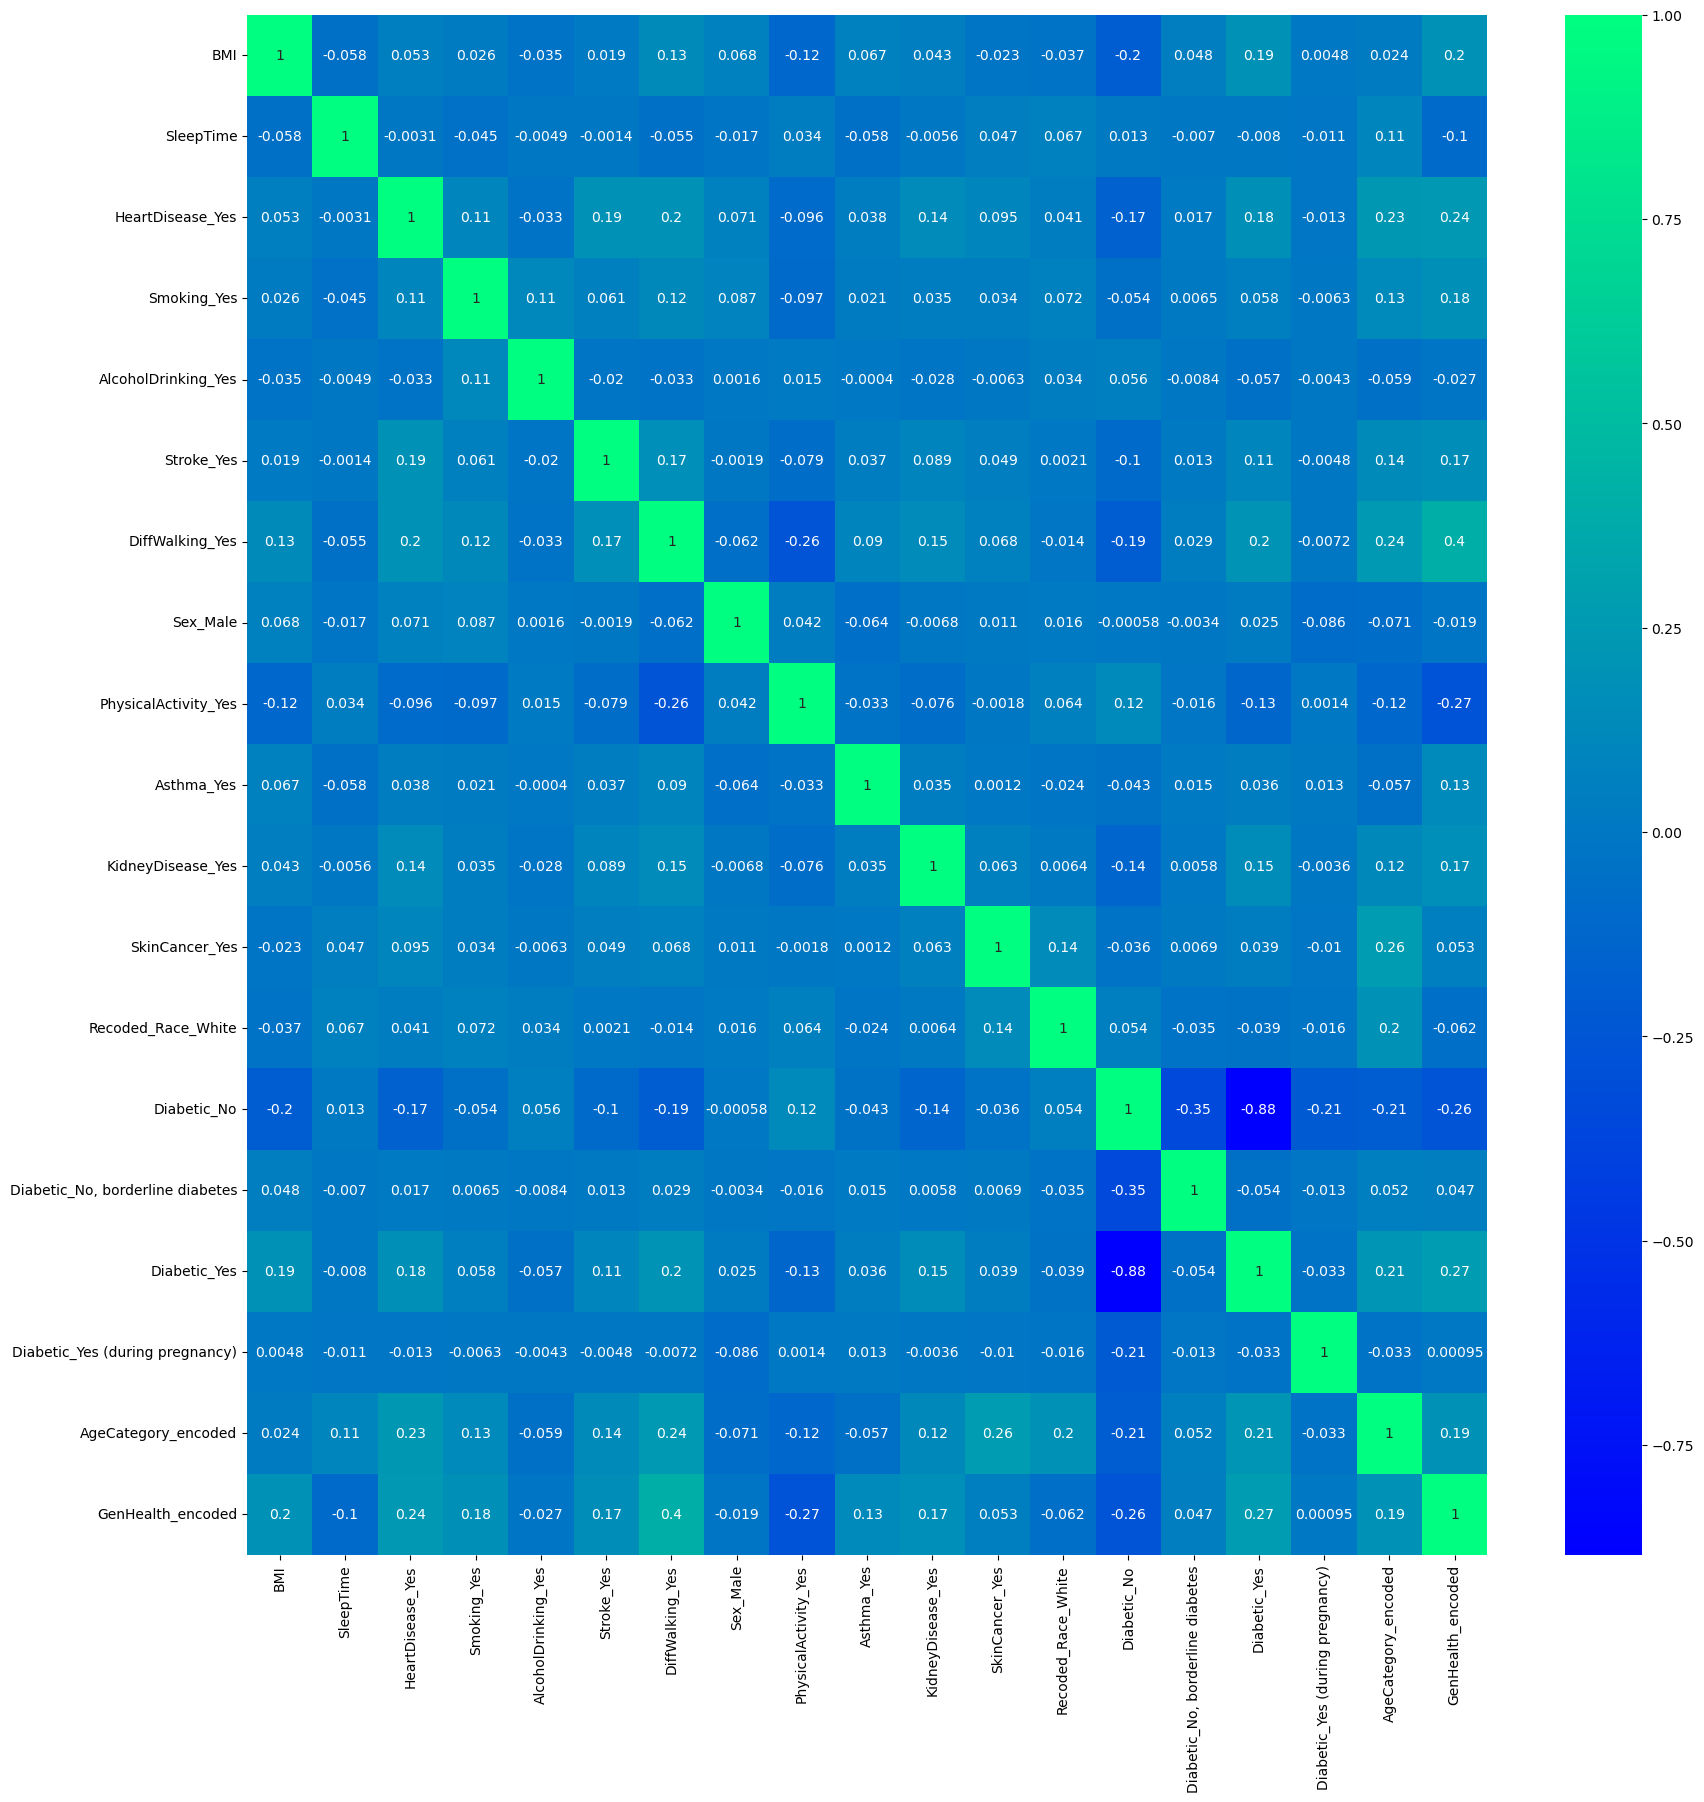

In [208]:
plt.figure(figsize=(20,20))
sns.heatmap(concat_df.corr(),annot=True,cmap="winter")
plt.show()

## Splitting Data Into Training and Test Sets, and Standardazing

In [209]:
concat_df.head()

,BMI,SleepTime,HeartDisease_Yes,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Recoded_Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy),AgeCategory_encoded,GenHealth_encoded
0,16.60,5.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,7.0,1.0
1,20.34,7.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,12.0,1.0
2,26.58,8.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,9.0,3.0
3,24.21,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,11.0,2.0
4,23.71,8.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,1.0


In [210]:
# Drop the response variable from the concatenated dataframe to obtain the predictors dataframe
X_predictors = concat_df.drop(['HeartDisease_Yes'], axis=1)

# Extract the response variable from the concatenated dataframe
Y_target = concat_df['HeartDisease_Yes']

## Response Variable: Dealing With Class Imbalance

Recall: that a class of the response variable ('Yes') is highly underrepresented (8.56% of the total instances) and the other ('No') represents 91.44% of the data (about 280k of 320k instances). If this is not balanced, the model will tend to classify into the class with more instances.

I decided to adopt undersampling technique using the RandomUnderSampler() to balance the class distribution in the dataset.

### Undersampling entire data using RandomUnderSampler()

In [211]:
undersample = RandomUnderSampler(sampling_strategy='majority', random_state=91)

X_unders, Y_unders = undersample.fit_resample(X_predictors, Y_target)
Y_unders = pd.Series(Y_unders)

print(f'No. of records before undersampling\n{Y_target.value_counts()}\n')
print(f'No. of records after undersampling\n{Y_unders.value_counts()}')

No. of records before undersampling
0.0    279644
1.0     25469
Name: HeartDisease_Yes, dtype: int64

No. of records after undersampling
0.0    25469
1.0    25469
Name: HeartDisease_Yes, dtype: int64


In [212]:
X_unders.columns

Index(['BMI', 'SleepTime', 'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
       'DiffWalking_Yes', 'Sex_Male', 'PhysicalActivity_Yes', 'Asthma_Yes',
       'KidneyDisease_Yes', 'SkinCancer_Yes', 'Recoded_Race_White',
       'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)', 'AgeCategory_encoded',
       'GenHealth_encoded'],
      dtype='object')

There is even representation on classes in both data sets. I proceed to standardize the data because the model to be fitted on the data is the Gradient Boosting Model which can be sensitive to the scale of input features.

Recall that the 'Recorded_White_Race' feature was initially encoded as a binary categorical variable before the scaling process. However, in attempt to view the unique classes of this feature, I noticed that the original values of 0 and 1 were not preserved after scaling. Instead, the transformed values were continuous, with values that ranged from negative to positive. This change in values is a consequence of standardizing the data. For the purpose of this project, the original variables of 0 and 1 in this feature need to be preserved for future computations. To achieve this;
* All binary categorical variables were first separated from the rest of the features.
* I then proceeded to scale the non-binary features and converted it to a pandas dataframe
* Finally, I concatenated the scaled non-binary features and the binary features i separated initially.

After these steps, the data was split into the training and testing sets with the original values of the binary features preserved.

In [288]:
# Separate the binary categorical variables from the rest of the features
binary_cols = ['Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes',
               'DiffWalking_Yes', 'Sex_Male', 'PhysicalActivity_Yes', 'Asthma_Yes',
               'KidneyDisease_Yes', 'SkinCancer_Yes', 'Recoded_Race_White',
               'Diabetic_No', 'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
               'Diabetic_Yes (during pregnancy)']

X_unders_binary = X_unders[binary_cols]
X_unders_nonbinary = X_unders.drop(binary_cols, axis=1)

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the non-binary features
X_unders_nonbinary_scaled = scaler.fit_transform(X_unders_nonbinary)
X_unders_nonbinary_scaled_df = pd.DataFrame(X_unders_nonbinary_scaled, columns=X_unders_nonbinary.columns)

# Concatenate the scaled non-binary features and the binary features
X_unders_scaled = pd.concat([X_unders_nonbinary_scaled_df, X_unders_binary], axis=1)


# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X_unders_scaled, Y_unders, train_size=0.8, random_state=91)


In [214]:
X_train['Recoded_Race_White'].unique()

array([1., 0.])

In [215]:
X_train.columns

Index(['BMI', 'SleepTime', 'AgeCategory_encoded', 'GenHealth_encoded',
       'Smoking_Yes', 'AlcoholDrinking_Yes', 'Stroke_Yes', 'DiffWalking_Yes',
       'Sex_Male', 'PhysicalActivity_Yes', 'Asthma_Yes', 'KidneyDisease_Yes',
       'SkinCancer_Yes', 'Recoded_Race_White', 'Diabetic_No',
       'Diabetic_No, borderline diabetes', 'Diabetic_Yes',
       'Diabetic_Yes (during pregnancy)'],
      dtype='object')

In [216]:
X_train.head()

,BMI,SleepTime,AgeCategory_encoded,GenHealth_encoded,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Recoded_Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
11754,1.513164,0.708321,0.359222,1.115879,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
44518,0.007148,-0.042589,0.064021,0.229392,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
14629,-0.185637,-0.793498,-2.002386,0.229392,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
31138,-0.233356,0.708321,0.064021,-0.657095,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
18096,-0.176093,0.708321,-2.297587,-1.543582,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [217]:
X_test.head()

,BMI,SleepTime,AgeCategory_encoded,GenHealth_encoded,Smoking_Yes,AlcoholDrinking_Yes,Stroke_Yes,DiffWalking_Yes,Sex_Male,PhysicalActivity_Yes,Asthma_Yes,KidneyDisease_Yes,SkinCancer_Yes,Recoded_Race_White,Diabetic_No,"Diabetic_No, borderline diabetes",Diabetic_Yes,Diabetic_Yes (during pregnancy)
7877,-0.433776,0.708321,-0.526381,0.229392,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
30525,0.047232,0.708321,1.244825,-1.543582,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
5965,-1.048399,-0.042589,-0.231180,-0.657095,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
30491,1.064604,-1.544408,-0.231180,2.002367,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21512,-0.878519,0.708321,-2.002386,-1.543582,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


# <span style="color:#87CEEB"> Model: Design, Implementation and Evaluation</span>




In [218]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

# initialize the gradient boosting classifier with desired hyperparameters
gb_clf = GradientBoostingClassifier(n_estimators=100, max_depth=5)

model = gb_clf.fit(X_train, Y_train)

train_predict=model.predict(X_train)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict))

test_predict=model.predict(X_test)
print("\nAccuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict))
print("Recall on testing data:", metrics.recall_score(Y_test, test_predict))


Accuracy on training data:  0.7798282208588957
Precision on training data: 0.7608953860210141
Recall on training data: 0.8167107972933215

Accuracy on testing data:  0.7685512367491166
Precision on testing data: 0.7486728903532858
Recall on testing data: 0.8059113300492611
CPU times: user 6.69 s, sys: 135 ms, total: 6.82 s
Wall time: 7.15 s


TN=3740, FP=1373, FN=985, TP=4090


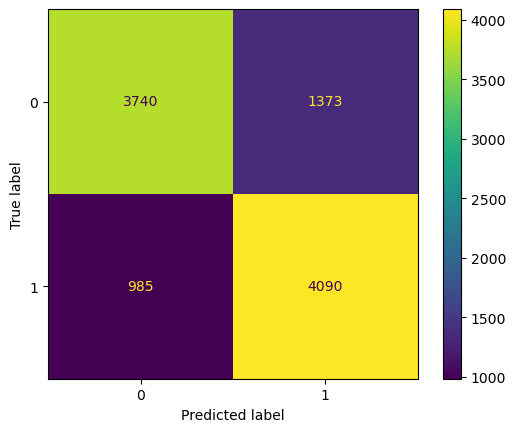

In [219]:
cm = metrics.confusion_matrix(Y_test, test_predict)
TN, FP, FN, TP = cm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP,FN, TP))
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

#### Calculating the accuracy, precision and recall from the confusionmatrix

In [220]:
# #### Calculating the accuracy, precision and recall from the confusionmatrix

calculated_accuracy = (TP+TN)/(TP+TN+FP+FN)
calculated_precision = (TP)/(TP+FP)
calculated_recall = (TP)/(TP+FN)
print("Calculated accuracy = ", calculated_accuracy)
print("Calculated precision = ", calculated_precision)
print("Calculated recall = ", calculated_recall)

Calculated accuracy =  0.7685512367491166
Calculated precision =  0.7486728903532858
Calculated recall =  0.8059113300492611


The calculated values from the confusion matrix are the same with the results from the evaluation on the test data.
This means that the model performed consistently well on both the training and test data. This indicates that the model is not overfitting the training data and is generalizing well to new, unseen data. This is a desirable outcome and suggests that the model is a good fit for the problem at hand. 

Also, there are similar values of accuracy, precision, and recall on the training and test data are very similar and this means that that the model is performing consistently on both datasets. This is a good indication that the model is not overfitting to the training data and is generalizing well to unseen data.

### Group Unaware

* Create a new predictor data without the 'Race' attribute. ('Recoded_Race_White' in this case because the 'Race' column had been converted to the binary column, 'Recoded_Race', and later renamed 'Recoded_Race_White' as a result of the OneHot encoding during the data preprocessing stage)
* Fit same model to the new training data
* Evaluate and compare results with the former

In [221]:
X_train['Recoded_Race_White'].unique()

array([1., 0.])

In [222]:
# Create 'Race-blind' data

X_train_rb = X_train.drop(columns=['Recoded_Race_White'])

X_test_rb = X_test.drop(columns=['Recoded_Race_White'])

In [223]:
%%time

gb_clf1 = GradientBoostingClassifier(n_estimators=100, max_depth=5)

# Race-blind Gradient Boosting module

model_rb = gb_clf1.fit(X_train_rb, Y_train)

train_predict_rb=model_rb.predict(X_train_rb)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train, train_predict_rb))
print("Precision on training data:", metrics.precision_score(Y_train, train_predict_rb))
print("Recall on training data:", metrics.recall_score(Y_train, train_predict_rb))

test_predict_rb=model_rb.predict(X_test_rb)
print("\nAccuracy on testing data: ", metrics.accuracy_score(Y_test, test_predict_rb))
print("Precision on testing data:", metrics.precision_score(Y_test, test_predict_rb))
print("Recall on testing data:", metrics.recall_score(Y_test, test_predict_rb))

Accuracy on training data:  0.7788220858895706
Precision on training data: 0.7594019236905685
Recall on training data: 0.8168578993821712

Accuracy on testing data:  0.7676678445229682
Precision on testing data: 0.747080291970803
Recall on testing data: 0.8066995073891625
CPU times: user 6.27 s, sys: 116 ms, total: 6.39 s
Wall time: 6.55 s


Comparison of Results of the outcomes in both scenarios:
* When the 'Recoded_Race_White' attribute is involved in the Gradient Boosting model.
* Race-blind model

There seem to be a fractional decrease across all 3 evalution metrics for the Race-blind regression model when compared with the former.

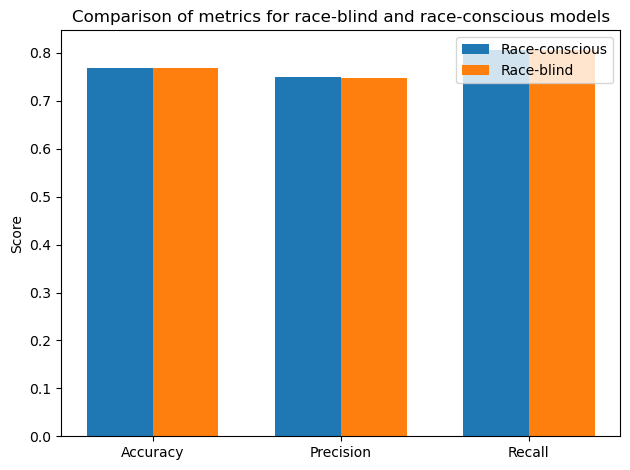


Metrics for the Race-conscious Model:
Accuracy:  0.7685512367491166
Precision:  0.7486728903532858
Recall:  0.8059113300492611

Metrics for the Race-blind Model:
Accuracy:  0.7676678445229682
Precision:  0.747080291970803
Recall:  0.8066995073891625


In [298]:
# Plot a chart to compare metrics of the Race-conscious and Race-blind models

# Metrics for Race-conscious model
test_predict=model.predict(X_test)
acc_rc = metrics.accuracy_score(Y_test, test_predict)
prec_rc = metrics.precision_score(Y_test, test_predict)
rec_rc = metrics.recall_score(Y_test, test_predict)

# Metrics for Race-blind model
test_predict_rb=model_rb.predict(X_test_rb)
acc_rb = metrics.accuracy_score(Y_test, test_predict_rb)
prec_rb = metrics.precision_score(Y_test, test_predict_rb)
rec_rb = metrics.recall_score(Y_test, test_predict_rb)

# Plot a grouped bar chart to compare the metrics for the two models
labels = ['Accuracy', 'Precision', 'Recall']
race_conscious = [acc_rc, prec_rc, rec_rc]
race_blind = [acc_rb, prec_rb, rec_rb]
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, race_conscious, width, label='Race-conscious')
rects2 = ax.bar(x + width/2, race_blind, width, label='Race-blind')

ax.set_ylabel('Score')
ax.set_title('Comparison of metrics for race-blind and race-conscious models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()

print("\nMetrics for the Race-conscious Model:")
print("Accuracy: ", acc_rc)
print("Precision: ", prec_rc)
print("Recall: ", rec_rc)

print("\nMetrics for the Race-blind Model:")
print("Accuracy: ", acc_rb)
print("Precision: ", prec_rb)
print("Recall: ", rec_rb)



### Splitting the True and Predicted Values into White and NonWhite Groups

In [224]:
#Get the indices for “White” and “Nonwhite” from the test data

PROTECTED = "Recoded_Race_White"
white = 1.0 
nonwhite = 0.0
white_indices = np.where(X_test[PROTECTED] == white)[0]
nonwhite_indices = np.where(X_test[PROTECTED] == nonwhite)[0]
print(white_indices, "No of Whites =", white_indices.size)
print(nonwhite_indices, "No of Non-whites =", nonwhite_indices.size)

[    1     2     4 ... 10184 10185 10186] No of Whites = 8089
[    0     3    16 ... 10165 10181 10187] No of Non-whites = 2099


In [289]:
#Extract the actual outcomes for the two groups

Y_test_white = [Y_test.values[i] for i in white_indices]
Y_test_nonwhite = [Y_test.values[i] for i in nonwhite_indices]

In [290]:
# Extract the predicted outcomes for the two groups

test_predict_white = [test_predict[i] for i in white_indices]
test_predict_nonwhite = [test_predict[i] for i in nonwhite_indices]

Generate a confusion matrix for the two groups

TN_w=2764, FP_w=1141, FN_w=733, TP_w=3451


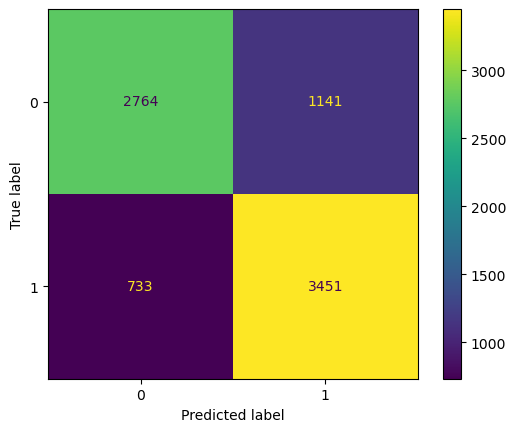

              precision    recall  f1-score   support

         0.0       0.79      0.71      0.75      3905
         1.0       0.75      0.82      0.79      4184

    accuracy                           0.77      8089
   macro avg       0.77      0.77      0.77      8089
weighted avg       0.77      0.77      0.77      8089



In [292]:
# Confusion matrix for 'White' group

cm_white = metrics.confusion_matrix(Y_test_white, test_predict_white)
TN_w, FP_w, FN_w, TP_w = cm_white.ravel()
print("TN_w={0}, FP_w={1}, FN_w={2}, TP_w={3}".format(TN_w, FP_w,FN_w, TP_w))
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=cm_white)
disp.plot()
plt.show()
print(metrics.classification_report(Y_test_white, test_predict_white))

In [229]:
calculated_accuracy_w = (TP_w+TN_w)/(TP_w+TN_w+FP_w+FN_w)
calculated_precision_w = (TP_w)/(TP_w+FP_w)
calculated_recall_w = (TP_w)/(TP_w+FN_w)
print("Calculated accuracy: White = ", calculated_accuracy_w)
print("Calculated precision: White = ", calculated_precision_w)
print("Calculated recall: White = ", calculated_recall_w)

Calculated accuracy: White =  0.7683273581406849
Calculated precision: White =  0.7515243902439024
Calculated recall: White =  0.8248087954110899


TN_nw=976, FP_nw=232, FN_nw=252, TP_nw=639


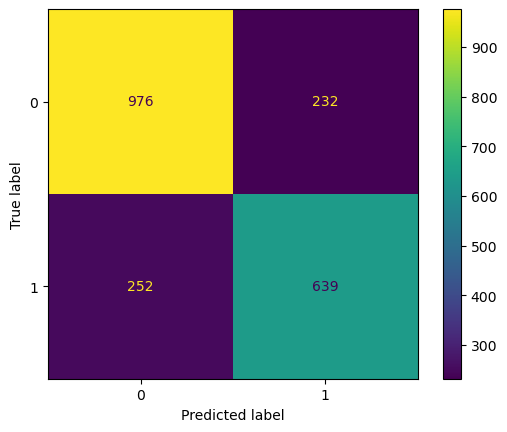

              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80      1208
         1.0       0.73      0.72      0.73       891

    accuracy                           0.77      2099
   macro avg       0.76      0.76      0.76      2099
weighted avg       0.77      0.77      0.77      2099



In [293]:
# Confusion matrix for 'NonWhite' group

cm_nonwhite = metrics.confusion_matrix(Y_test_nonwhite, test_predict_nonwhite)
TN_nw, FP_nw, FN_nw, TP_nw = cm_nonwhite.ravel()
print("TN_nw={0}, FP_nw={1}, FN_nw={2}, TP_nw={3}".format(TN_nw, FP_nw,FN_nw, TP_nw))
disp =metrics.ConfusionMatrixDisplay(confusion_matrix=cm_nonwhite)
disp.plot()
plt.show()
print(metrics.classification_report(Y_test_nonwhite, test_predict_nonwhite))

In [232]:
calculated_accuracy_nw = (TP_nw+TN_nw)/(TP_nw+TN_nw+FP_nw+FN_nw)
calculated_precision_nw = (TP_nw)/(TP_nw+FP_nw)
calculated_recall_nw = (TP_nw)/(TP_nw+FN_nw)
print("Calculated accuracy: Non-White = ", calculated_accuracy_nw)
print("Calculated precision: Non-White = ", calculated_precision_nw)
print("Calculated recall: Non-White = ", calculated_recall_nw)

Calculated accuracy: Non-White =  0.7694140066698428
Calculated precision: Non-White =  0.7336394948335246
Calculated recall: Non-White =  0.7171717171717171


### Applying some fairness criteria to the model

#### Equal Accuracy Fairness Criterion

In [233]:
# Main Model Accuracy
main_acc = calculated_accuracy

# Accuracy for each protected group
w_acc = calculated_accuracy_w
nw_acc = calculated_accuracy_nw

# calculate the average accuracy across both protected groups
avg_acc = (w_acc + nw_acc) / 2

# calculate the new decision threshold for the white group
white_threshold = (TP_w + FN_w) / (TP_w + FN_w + TN_w + FP_w) * main_acc / w_acc

# calculate the new decision threshold for the non-white group
nonwhite_threshold = (TP_nw + FN_nw) / (TP_nw + FN_nw + TN_nw + FP_nw) * main_acc / nw_acc

# apply the new decision thresholds for each group separately
white_predict = model.predict_proba(X_test)[:, 1] > white_threshold
nonwhite_predict = model.predict_proba(X_test)[:, 1] > nonwhite_threshold

# Extract the new predicted outcomes for the two groups
test_predict_white1 = [white_predict[i] for i in white_indices]
test_predict_nonwhite1 = [nonwhite_predict[i] for i in nonwhite_indices]

# calculate the new accuracy for each protected group
w_acc_new = accuracy_score(Y_test_white, test_predict_white1)
nw_acc_new = accuracy_score(Y_test_nonwhite, test_predict_nonwhite1)

# calculate the new accuracy for the main model
main_acc_new = (w_acc_new * len(white_indices) + nw_acc_new * len(nonwhite_indices)) / len(Y_test)

# print the new accuracies for both protected groups and the new accuracy of the model
print("New accuracy for White Race: ", w_acc_new,"({:.2%}".format(w_acc_new),")")
print("New accuracy for Non-White Race: ", nw_acc_new,"({:.2%}".format(nw_acc_new),")")
print("New Model accuracy: ", main_acc_new,"({:.2%}".format(main_acc_new),")")

New accuracy for White Race:  0.7673383607368031 (76.73% )
New accuracy for Non-White Race:  0.7770366841353026 (77.70% )
New Model accuracy:  0.7693364742834707 (76.93% )


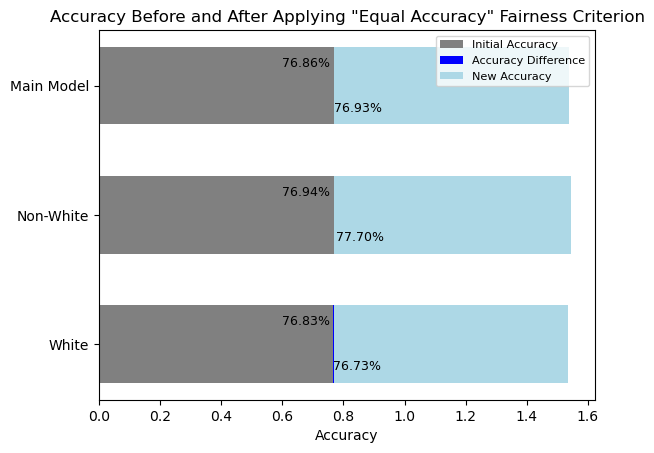

In [234]:
# Store the initial accuracy for each protected group and the main model
initial_acc = [calculated_accuracy_w, calculated_accuracy_nw, calculated_accuracy]

# Store the new accuracy for each protected group and the main model
new_acc = [w_acc_new, nw_acc_new, main_acc_new]

# calculate the difference between the initial and new accuracies
diff = [new_acc[i] - initial_acc[i] for i in range(len(initial_acc))]

# format the initial and new accuracies as percentages
initial_acc_percent = [f'{acc*100:.2f}%' for acc in initial_acc]
new_acc_percent = [f'{acc*100:.2f}%' for acc in new_acc]

# create a horizontal bar chart to show the difference in accuracy before and after applying the fairness criterion
labels = ['White', 'Non-White', 'Main Model']
y_pos = np.arange(len(labels))

fig, ax = plt.subplots()

# add the initial accuracy bars
ax.barh(y_pos, initial_acc, height=0.6, color='gray', label='Initial Accuracy')
# add the difference bars
ax.barh(y_pos, diff, height=0.6, left=initial_acc, color='blue', label='Accuracy Difference')
# add the new accuracy bars
ax.barh(y_pos, new_acc, height=0.6, left=initial_acc, color='lightblue', label='New Accuracy')

# add the initial and new accuracy values as percentages
for i in range(len(labels)):
    ax.text(initial_acc[i] - 0.17, y_pos[i] + 0.15, initial_acc_percent[i], color='black', fontweight='light', fontsize=9)
    ax.text(new_acc[i] - 0.00000005, y_pos[i] - 0.2, new_acc_percent[i], color='black', fontweight='light', fontsize=9)

# add labels, title, and legend
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Before and After Applying "Equal Accuracy" Fairness Criterion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.legend(fontsize=8.1)

plt.show()


As expected, there is no significant change to the initial accuracies of both groups. This means that the fractional difference between the accuracies of both groups was very small, and hence, the modification to the decision thresholds did not make a significant difference and was not necessary. In this case, it may be difficult to achieve perfect equality in accuracy between the two protected groups. It can be fair to say that the predictive accuracies for both protected groups are relatively equal and that the model satisfies Equal Accuracy.

#### Demographic Parity Fairness Criterion

'test_predict_white' is a boolean array of the same length as Y_test, where True corresponds to a positive prediction and False corresponds to a negative prediction for the White Race group.

To calculate the proportion of positive predictions for the White group, I count the number of positive predictions and divide it by the total number of predictions for the White group. The number of positive predictions for the White group is equal to the sum of `test_predict_white`, since True has a numerical value of 1 and False has a numerical value of 0. The total number of predictions for the White group is equal to the length of `test_predic_white`. Therefore, the proportion of positive predictions for the White group can be calculated using the code below. This line of code computes the sum of all True values in test_predict_white (which corresponds to the number of positive predictions for the White group), and divides it by the total number of predictions for the White group, which is simply the length of `test_predict_white`. This gives us the proportion of positive predictions for the White group.

In [235]:
# calculating the proportion of positive predictions for the White race group
white_pos_prop = np.sum(test_predict_white) / len(test_predict_white)

Repeat same for the Nonwhite Race Group

In [236]:
# calculating the proportion of positive predictions for the Nonwhite race group
nonwhite_pos_prop = np.sum(test_predict_nonwhite) / len(test_predict_nonwhite)

In [237]:
# Calculating the Initial Disparity Impact Ratio

initial_DIR = nonwhite_pos_prop/white_pos_prop

# calculating difference in proportion of positive predictions between both groups
pos_prop_diff = np.abs(white_pos_prop - nonwhite_pos_prop)

print("Proportion of Positive Predictions for White:",white_pos_prop)
print("Proportion of Positive Predictions for NonWhite:",nonwhite_pos_prop)
print("Initial Disparity Impact Ratio: {:.2f}".format(initial_DIR))
print("Difference in Proportins:",pos_prop_diff)

Proportion of Positive Predictions for White: 0.5676845098281617
Proportion of Positive Predictions for NonWhite: 0.41495950452596475
Initial Disparity Impact Ratio: 0.73
Difference in Proportins: 0.1527250053021969


In [238]:
pos_prop_diff/2

0.07636250265109845

In [239]:
# check if the difference in proportion of positive predictions is below a certain threshold (e.g. 0.05)
if pos_prop_diff < 0.15:
    print("Model satisfies demographic parity")
else:
    print("Model violates demographic parity")

Model violates demographic parity


Adjust the model to ensure DIR is closer to 1

In [240]:
# setting the decision threshold to ensure a closer to equal proportion of positive predictions
dp_threshold = pos_prop_diff/2

# apply the new decision threshold to get the new predictions
dp_predict = model.predict_proba(X_test)[:, 1] > dp_threshold

# Extract the new predicted outcomes for the two groups
dp_predict_white = [dp_predict[i] for i in white_indices]
dp_predict_nonwhite = [dp_predict[i] for i in nonwhite_indices]

white_pos_prop_new = np.sum(dp_predict_white) / len(dp_predict_white)
nonwhite_pos_prop_new = np.sum(dp_predict_nonwhite) / len(dp_predict_nonwhite)
dp_DIR = nonwhite_pos_prop_new/white_pos_prop_new

print("New Proportion of Positive Predictions for White:",white_pos_prop_new)
print("New Proportion of Positive Predictions for NonWhite:",nonwhite_pos_prop_new)
print("New Disparity Impact Ratio: {:.2f}".format(dp_DIR))


New Proportion of Positive Predictions for White: 0.8956607738904685
New Proportion of Positive Predictions for NonWhite: 0.8156264888041924
New Disparity Impact Ratio: 0.91


Visualize DIRs (Before and after Demographic Disparity)

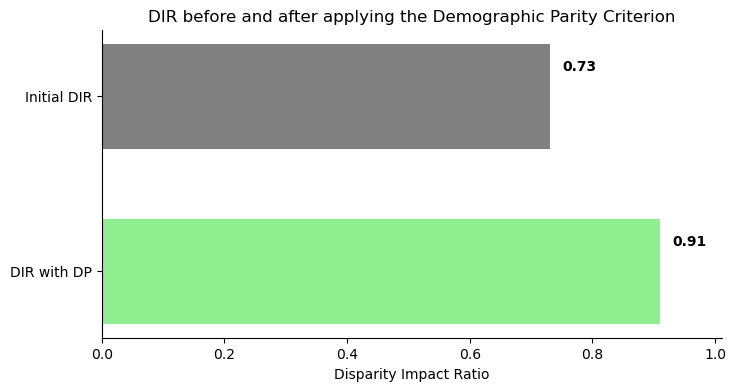

In [241]:
# plot the initial DIR and the DIR with DP as a horizontal bar chart
labels = ['Initial DIR', 'DIR with DP']
values = [initial_DIR, dp_DIR]
#sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8, 4))
ax.barh(labels, values, height=0.6, color=['gray','lightgreen'])
ax.set_xlabel('Disparity Impact Ratio')
ax.set_xlim([0, max(values) + 0.1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.invert_yaxis()
for i, v in enumerate(values):
    ax.text(v + 0.02, i - 0.15, str(round(v, 2)), color='black', fontweight='bold')

plt.title('DIR before and after applying the Demographic Parity Criterion')
plt.show()


Visualize Proportion of Positive Predictions (Before and after Demographic Disparity)

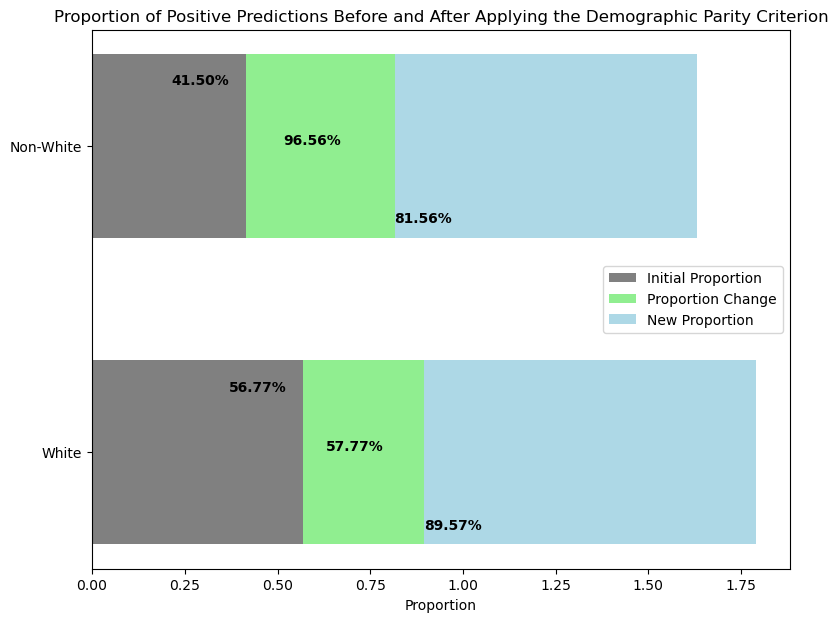

In [242]:
# Store the initial proportion of positive predictions for each protected group
initial_prop = [white_pos_prop, nonwhite_pos_prop]

# Store the new proportion of positive predictions for each protected group after applying demographic parity
new_prop = [white_pos_prop_new, nonwhite_pos_prop_new]

# Calculate the difference between the initial and new proportions
diff_prop = [new_prop[i] - initial_prop[i] for i in range(len(initial_prop))]

# Calculate the percentage difference between the initial and new proportions
diff_prop_percent = [f'{(diff_prop[i]/initial_prop[i])*100:.2f}%' for i in range(len(initial_prop))]

# Format the initial and new proportions as percentages
initial_prop_percent = [f'{prop*100:.2f}%' for prop in initial_prop]
new_prop_percent = [f'{prop*100:.2f}%' for prop in new_prop]

# Create a horizontal bar chart to show the difference in proportion before and after applying the fairness criterion
labels = ['White', 'Non-White']
y_pos = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(9, 7))

# Add the initial proportion bars
ax.barh(y_pos, initial_prop, height=0.6, color='gray', label='Initial Proportion')
# Add the difference bars
ax.barh(y_pos, diff_prop, height=0.6, left=initial_prop, color='lightgreen', label='Proportion Change')
# Add the new proportion bars
ax.barh(y_pos, new_prop, height=0.6, left=[sum(x) for x in zip(initial_prop,diff_prop)], color='lightblue', label='New Proportion')

# Add the initial, difference, and new proportion values as percentages
for i in range(len(labels)):
    ax.text(initial_prop[i] - 0.2, y_pos[i] + 0.2, initial_prop_percent[i], color='black', fontweight='bold', fontsize=10)
    ax.text(new_prop[i] - 0.00001, y_pos[i] - 0.25, new_prop_percent[i], color='black', fontweight='bold', fontsize=10)
    ax.text(sum([initial_prop[i], diff_prop[i]/2]) - 0.1, y_pos[i] + 0.007, diff_prop_percent[i], color='black', fontweight='bold', fontsize=10)

# Add labels, title, and legend
ax.set_xlabel('Proportion')
ax.set_title('Proportion of Positive Predictions Before and After Applying the Demographic Parity Criterion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.legend(fontsize=10)

#plt.title('DIR before and after applying Demographic Parity Criterion')
plt.show()


Check to see how the adjustments affect the model accuracy. Visualize the predictive accuracies (Before and after Demographic Disparity).

In [243]:
# calculating the new accuracy for each protected group and the overall accuracy
dp_accuracy = accuracy_score(Y_test, dp_predict)
dp_accuracy_white = accuracy_score(Y_test_white, dp_predict_white)
dp_accuracy_nonwhite = accuracy_score(Y_test_nonwhite, dp_predict_nonwhite)

# print the new accuracies for both protected groups and the new accuracy of the model
print("New accuracy for White group: ", dp_accuracy_white)
print("New accuracy for Non-White group: ", dp_accuracy_nonwhite)
print("New overall accuracy: ", dp_accuracy)

New accuracy for White group:  0.6119421436518729
New accuracy for Non-White group:  0.580276322058123
New overall accuracy:  0.6054181389870436


Visualize the Accuracies (Before and After DP)

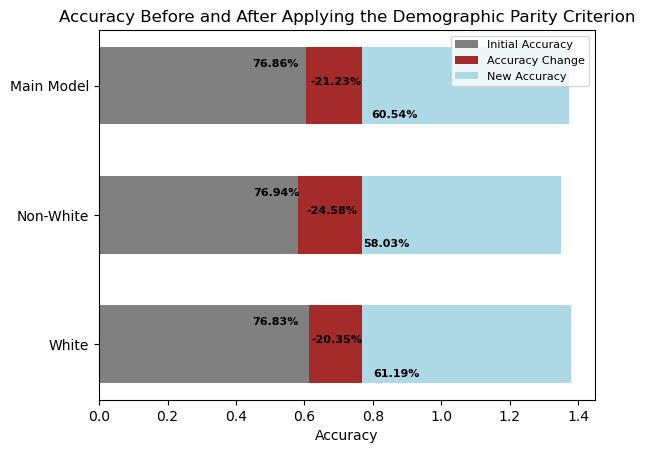

In [244]:
# Store the new accuracy for each protected group and the main model
dp_new_acc = [dp_accuracy_white, dp_accuracy_nonwhite, dp_accuracy]

# calculate the difference between the initial and new accuracies
diff = [dp_new_acc[i] - initial_acc[i] for i in range(len(initial_acc))]

# Calculate the percentage difference between the initial and new accuracies
diff_acc_percent = [f'{(diff[i]/initial_acc[i])*100:.2f}%' for i in range(len(initial_acc))]

# format the initial and new accuracies as percentages
initial_acc_percent = [f'{acc*100:.2f}%' for acc in initial_acc]
dp_new_acc_percent = [f'{acc*100:.2f}%' for acc in dp_new_acc]

# create a horizontal bar chart to show the difference in accuracy before and after applying the fairness criterion
labels = ['White', 'Non-White', 'Main Model']
y_pos = np.arange(len(labels))

fig, ax = plt.subplots()

# add the initial accuracy bars
ax.barh(y_pos, initial_acc, height=0.6, color='gray', label='Initial Accuracy')

# add the difference bars
ax.barh(y_pos, diff, height=0.6, left=initial_acc, color='brown', label='Accuracy Change')

# add the new accuracy bars
ax.barh(y_pos, dp_new_acc, height=0.6, left=initial_acc, color='lightblue', label='New Accuracy')

# add the initial and new accuracy values as percentages
for i in range(len(labels)):
    ax.text(initial_acc[i] - 0.32, y_pos[i] + 0.15, initial_acc_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(dp_new_acc[i] + 0.19, y_pos[i] - 0.25, dp_new_acc_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(sum([initial_acc[i], diff[i]/2]) - 0.07, y_pos[i] + 0.007, diff_acc_percent[i], color='black', fontweight='bold', fontsize=8)

# add labels, title, and legend
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Before and After Applying the Demographic Parity Criterion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.legend(fontsize=8.1)

plt.show()

#### Equal Opportunity Criterion

In [300]:
# setting the decision threshold to ensure equal true positive rates
eo_threshold = abs(calculated_recall_w - calculated_recall_nw) / 2

# set the decision threshold to ensure equal true positive rates
#eo_threshold = (calculated_recall_w + calculated_recall_nw) / 2

# apply the new decision threshold to get the new predictions
eo_predict = model.predict_proba(X_test)[:, 1] > eo_threshold

# Extract the new predicted outcomes for the two groups
eo_predict_white = [eo_predict[i] for i in white_indices]
eo_predict_nonwhite = [eo_predict[i] for i in nonwhite_indices]

# calculate the new true positive rate for each protected group and the overall true positive rate
eo_cm = metrics.confusion_matrix(Y_test, eo_predict)
eo_cm_white = metrics.confusion_matrix(Y_test_white, eo_predict_white)
eo_cm_nonwhite = metrics.confusion_matrix(Y_test_nonwhite, eo_predict_nonwhite)
eo_tpr = eo_cm[1, 1] / (eo_cm[1, 0] + eo_cm[1, 1])
eo_tpr_white = eo_cm_white[1, 1] / (eo_cm_white[1, 0] + eo_cm_white[1, 1])
eo_tpr_nonwhite = eo_cm_nonwhite[1, 1] / (eo_cm_nonwhite[1, 0] + eo_cm_nonwhite[1, 1])

# print the new true positive rate for each protected group and the overall true positive rate
print("New TPR for White group: ", eo_tpr_white)
print("New TPR for Non-White group: ", eo_tpr_nonwhite)
print("New overall TPR: ", eo_tpr)

#print("Initial TPR for White group: ", calculated_recall_w)
#print("Initial TPR for Non-White group: ", calculated_recall_nw)
#print("Initial overall TPR: ", calculated_recall)


New TPR for White group:  0.9966539196940727
New TPR for Non-White group:  0.9831649831649831
New overall TPR:  0.9942857142857143


Visualize the TPRs for before and After

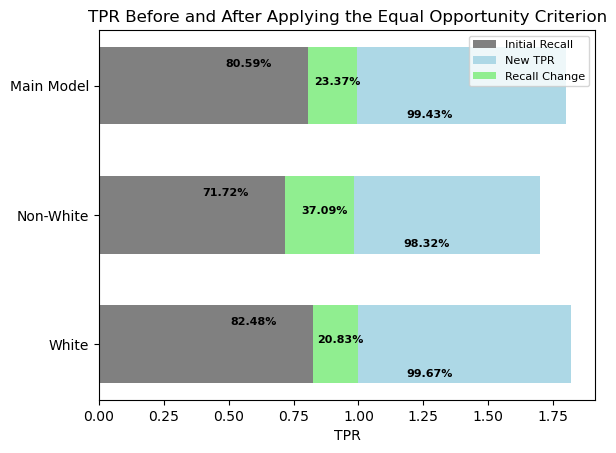

In [294]:
# Store the initial recall values for each protected group and the main model
initial_tpr = [calculated_recall_w, calculated_recall_nw, calculated_recall]

# Store the new recall values for each protected group and the main model
new_tpr = [eo_tpr_white, eo_tpr_nonwhite, eo_tpr]

# calculate the difference between the initial and new accuracies
diff_tpr = [new_tpr[i] - initial_tpr[i] for i in range(len(initial_tpr))]

# Calculate the percentage difference between the initial and new accuracies
diff_tpr_percent = [f'{(diff_tpr[i]/initial_tpr[i])*100:.2f}%' for i in range(len(initial_tpr))]

# format the initial and new recall values as percentages
initial_tpr_percent = [f'{acc*100:.2f}%' for acc in initial_tpr]
new_tpr_percent = [f'{acc*100:.2f}%' for acc in new_tpr]

# set the width of the bars
bar_width = 0.3

# create a horizontal bar chart to show the difference in accuracy before and after applying the fairness criterion
labels = ['White', 'Non-White', 'Main Model']
y_pos = np.arange(len(labels))

fig, ax = plt.subplots()

# add the initial TPR bars
ax.barh(y_pos, initial_tpr, height=0.6, color='gray', label='Initial Recall')

# add the new accuracy bars
ax.barh(y_pos, new_tpr, height=0.6, left=initial_tpr, color='lightblue', label='New TPR')

# add the difference bars
ax.barh(y_pos, diff_tpr, height=0.6, left=initial_tpr, color='lightgreen', label='Recall Change')

# add the initial and new accuracy values as percentages
for i in range(len(labels)):
    ax.text(initial_tpr[i] - 0.32, y_pos[i] + 0.15, initial_tpr_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(new_tpr[i] + 0.19, y_pos[i] - 0.25, new_tpr_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(sum([initial_tpr[i], diff_tpr[i]/2]) - 0.07, y_pos[i] + 0.007, diff_tpr_percent[i], color='black', fontweight='bold', fontsize=8)


# add labels, title, and legend
ax.set_xlabel('TPR')
ax.set_title('TPR Before and After Applying the Equal Opportunity Criterion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.legend(fontsize=8.1)
#ax.set_xlim(left=0, right=max(diff_tpr)*1.2)


plt.show()


In [302]:
# calculate the new accuracy for each protected group and the overall accuracy
eo_accuracy = accuracy_score(Y_test, eo_predict)
eo_accuracy_white = accuracy_score(Y_test_white, eo_predict_white)
eo_accuracy_nonwhite = accuracy_score(Y_test_nonwhite, eo_predict_nonwhite)

# print the new accuracies for both protected groups and the new accuracy of the model
print("New accuracy for White group: ", eo_accuracy_white)
print("New accuracy for Non-White group: ", eo_accuracy_nonwhite)
print("New overall accuracy: ", eo_accuracy)

print("Initial accuracy for White group: ", calculated_accuracy_w)
print("Initial accuracy for Non-White group: ", calculated_accuracy_nw)
print("Initial overall accuracy: ", calculated_accuracy)

New accuracy for White group:  0.5736184942514526
New accuracy for Non-White group:  0.5078608861362554
New overall accuracy:  0.5600706713780919
Initial accuracy for White group:  0.7683273581406849
Initial accuracy for Non-White group:  0.7694140066698428
Initial overall accuracy:  0.7685512367491166


Visualize the Accuracies for before and After EO

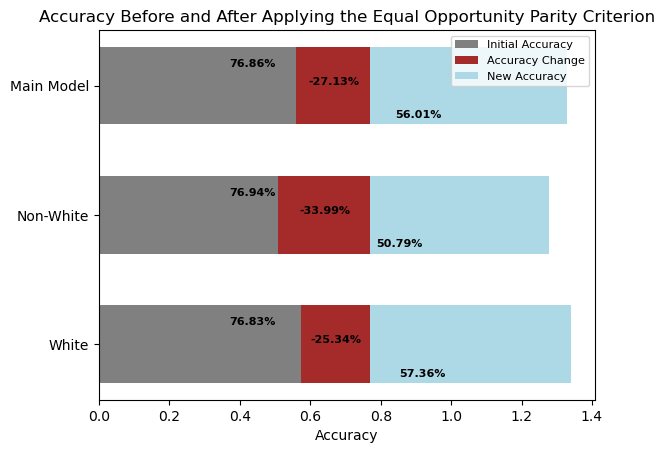

In [250]:
# Store the new accuracy for each protected group and the main model
eo_new_acc = [eo_accuracy_white, eo_accuracy_nonwhite, eo_accuracy]

# calculate the difference between the initial and new accuracies
diff = [eo_new_acc[i] - initial_acc[i] for i in range(len(initial_acc))]

# Calculate the percentage difference between the initial and new accuracies
eo_diff_acc_percent = [f'{(diff[i]/initial_acc[i])*100:.2f}%' for i in range(len(initial_acc))]

# format the initial and new accuracies as percentages
initial_acc_percent = [f'{acc*100:.2f}%' for acc in initial_acc]
eo_new_acc_percent = [f'{acc*100:.2f}%' for acc in eo_new_acc]

# create a horizontal bar chart to show the difference in accuracy before and after applying the fairness criterion
labels = ['White', 'Non-White', 'Main Model']
y_pos = np.arange(len(labels))

fig, ax = plt.subplots()

# add the initial accuracy bars
ax.barh(y_pos, initial_acc, height=0.6, color='gray', label='Initial Accuracy')

# add the difference bars
ax.barh(y_pos, diff, height=0.6, left=initial_acc, color='brown', label='Accuracy Change')

# add the new accuracy bars
ax.barh(y_pos, eo_new_acc, height=0.6, left=initial_acc, color='lightblue', label='New Accuracy')

# add the initial and new accuracy values as percentages
for i in range(len(labels)):
    ax.text(initial_acc[i] - 0.4, y_pos[i] + 0.15, initial_acc_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(eo_new_acc[i] + 0.28, y_pos[i] - 0.25, eo_new_acc_percent[i], color='black', fontweight='bold', fontsize=8)
    ax.text(sum([initial_acc[i], diff[i]/2]) - 0.07, y_pos[i] + 0.007, eo_diff_acc_percent[i], color='black', fontweight='bold', fontsize=8)

# add labels, title, and legend
ax.set_xlabel('Accuracy')
ax.set_title('Accuracy Before and After Applying the Equal Opportunity Parity Criterion')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.legend(fontsize=8.1)

plt.show()

<a id="section5"></a>
# Conclusion

It has been observed that satisfying one fairness constraint can have adverse effects on other metrics. Determining the appropriate decision threshold for a model is a complex task that depends on various factors, including the specific characteristics of the data and the desired trade-offs between different types of errors and disparities.
Further research can aim to determine more optimal decision thresholds that further maximize the overall accuracy while satisfying fairness criteria constraints, and also, to further investigate the bias among the other minority race groups within the Non-white group.
Ultimately, using a dataset with a relatively even distribution of instances among protected groups can further ensure that a model is generally fair in its predictions.